# Импортируем библиотеки и читаем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)


In [2]:
df = pd.read_csv('./fintech-credit-scoring/application_info.csv')

In [3]:
df_target = pd.read_csv('./fintech-credit-scoring/default_flg.csv')

# Значения колонок


    id - Анонимизированный идентификатор заявителя
    application_dt - Дата подачи заявки
    sample_cd - Категория выборки
    education_cd - Образование
    gender_cd - Пол
    age - Возраст
    car_own_flg - Флаг наличия автомобиля
    car_type_flg - Флаг наличия иномарки
    appl_rej_cnt - Количество отказанных прошлых заявок
    good_work_flg - Флаг наличия "хорошей" работы
    Score_bki - Скор балл по данным из бюро кредитных историй
    out_request_cnt - Количество запросов в бюро
    region_rating - Рейтинг региона
    home_address_cd - Категоризатор домашнего адреса
    work_address_cd - Категоризатор рабочего адреса
    income - Доход заявителя
    SNA - Связь заявителя с клиентами
    first_time_cd - Давность наличия информации о заявителе
    Air_flg - Наличие загран паспорта
    default_flg - Флаг дефолта по кредиту

In [4]:
df = pd.concat([df, df_target], axis=1)
df

,id,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,id,default_flg
0,1,01JAN2014,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,1.0,0.0
1,2,01JAN2014,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,2.0,0.0
2,3,01JAN2014,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,3.0,0.0
3,4,01JAN2014,train,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,4.0,0.0
4,5,01JAN2014,train,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,205292,31MAR2015,test,UGR,F,24,N,N,0,1,-2.001592,0,80,1,2,60000,1,3,N,NaN,NaN
205292,205293,31MAR2015,test,SCH,F,48,N,N,2,1,-2.088683,3,60,1,3,25000,3,2,N,NaN,NaN
205293,205294,31MAR2015,test,GRD,F,33,Y,Y,0,1,-2.140081,2,80,1,2,100000,1,4,Y,NaN,NaN
205294,205295,31MAR2015,test,PGR,M,27,Y,Y,1,0,-1.552576,0,50,1,3,32500,1,3,Y,NaN,NaN


In [5]:
df.drop(columns=['id', 'application_dt'], inplace=True)

In [6]:
df

,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
0,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0.0
1,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0.0
2,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0.0
3,train,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0.0
4,train,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,test,UGR,F,24,N,N,0,1,-2.001592,0,80,1,2,60000,1,3,N,NaN
205292,test,SCH,F,48,N,N,2,1,-2.088683,3,60,1,3,25000,3,2,N,NaN
205293,test,GRD,F,33,Y,Y,0,1,-2.140081,2,80,1,2,100000,1,4,Y,NaN
205294,test,PGR,M,27,Y,Y,1,0,-1.552576,0,50,1,3,32500,1,3,Y,NaN


ЧТОБЫ НЕ ВООЗИТЬСЯ ОТДЕЛЬНО С ТРЕЙНОМ И ТЕСТОМ будем с дф работать

In [7]:
df.dtypes

sample_cd           object
education_cd        object
gender_cd           object
age                  int64
car_own_flg         object
car_type_flg        object
appl_rej_cnt         int64
good_work_flg        int64
Score_bki          float64
out_request_cnt      int64
region_rating        int64
home_address_cd      int64
work_address_cd      int64
income               int64
SNA                  int64
first_time_cd        int64
Air_flg             object
default_flg        float64
dtype: object

In [8]:
df.isna().sum()

sample_cd              0
education_cd         912
gender_cd              0
age                    0
car_own_flg            0
car_type_flg           0
appl_rej_cnt           0
good_work_flg          0
Score_bki              0
out_request_cnt        0
region_rating          0
home_address_cd        0
work_address_cd        0
income                 0
SNA                    0
first_time_cd          0
Air_flg                0
default_flg        24480
dtype: int64

In [9]:
X_train = df.drop(columns=['default_flg', 'sample_cd', 'education_cd'])

In [10]:
y = df[['default_flg', 'sample_cd']]

# Будем предсказывать missing values в education_cd

In [11]:
y_train = df['education_cd']

In [12]:
X_train.dtypes

gender_cd           object
age                  int64
car_own_flg         object
car_type_flg        object
appl_rej_cnt         int64
good_work_flg        int64
Score_bki          float64
out_request_cnt      int64
region_rating        int64
home_address_cd      int64
work_address_cd      int64
income               int64
SNA                  int64
first_time_cd        int64
Air_flg             object
dtype: object

In [13]:
cat_cols = X_train.select_dtypes(include=['object']).columns


In [14]:
df_cat = pd.get_dummies(X_train[cat_cols])

In [15]:
df_cat

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y
0,False,True,False,True,False,True,True,False
1,True,False,True,False,True,False,True,False
2,False,True,True,False,True,False,True,False
3,True,False,True,False,True,False,True,False
4,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False
205292,True,False,True,False,True,False,True,False
205293,True,False,False,True,False,True,False,True
205294,False,True,False,True,False,True,False,True


In [16]:
numeric = X_train.select_dtypes(include=['float64','int64']).columns

In [17]:
df_numeric = X_train[numeric]

In [18]:
df_numeric

,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd
0,27,0,0,-1.917831,0,40,2,3,32000,1,4
1,26,0,0,-1.153144,2,60,2,3,50000,2,1
2,35,0,1,-1.732810,0,40,1,2,20000,4,3
3,35,0,1,-2.552133,2,20,2,3,80000,1,3
4,24,0,0,-1.914581,1,50,2,3,27000,1,2
...,...,...,...,...,...,...,...,...,...,...,...
205291,24,0,1,-2.001592,0,80,1,2,60000,1,3
205292,48,2,1,-2.088683,3,60,1,3,25000,3,2
205293,33,0,1,-2.140081,2,80,1,2,100000,1,4
205294,27,1,0,-1.552576,0,50,1,3,32500,1,3


In [19]:
X_train = pd.concat([df_cat, df_numeric], axis=1)

In [20]:
X_train

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd
0,False,True,False,True,False,True,True,False,27,0,0,-1.917831,0,40,2,3,32000,1,4
1,True,False,True,False,True,False,True,False,26,0,0,-1.153144,2,60,2,3,50000,2,1
2,False,True,True,False,True,False,True,False,35,0,1,-1.732810,0,40,1,2,20000,4,3
3,True,False,True,False,True,False,True,False,35,0,1,-2.552133,2,20,2,3,80000,1,3
4,True,False,True,False,True,False,True,False,24,0,0,-1.914581,1,50,2,3,27000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False,24,0,1,-2.001592,0,80,1,2,60000,1,3
205292,True,False,True,False,True,False,True,False,48,2,1,-2.088683,3,60,1,3,25000,3,2
205293,True,False,False,True,False,True,False,True,33,0,1,-2.140081,2,80,1,2,100000,1,4
205294,False,True,False,True,False,True,False,True,27,1,0,-1.552576,0,50,1,3,32500,1,3


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(n_jobs=-1)

In [23]:
y_train = pd.DataFrame(y_train)

In [24]:
y_train['education_cd'].unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD', nan], dtype=object)

In [25]:
index_missing = y_train[y_train['education_cd'].isna()].index

In [26]:
index_missing

Index([  1076,   1524,   1527,   1533,   1557,   1644,   1646,   1755,   1759,
         1780,
       ...
       204753, 204787, 204788, 204813, 204849, 204868, 205219, 205237, 205283,
       205290],
      dtype='int64', length=912)

In [27]:
X_train_with_na = X_train.loc[index_missing]
X_train_without_na = X_train.drop(index_missing)

In [28]:
X_train_with_na

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd
1076,True,False,False,True,True,False,True,False,52,0,0,-2.110483,0,50,1,2,210000,1,4
1524,True,False,True,False,True,False,True,False,35,0,0,-1.870535,1,80,2,3,25000,1,4
1527,False,True,True,False,True,False,True,False,53,0,0,-1.886693,1,80,2,3,40000,1,4
1533,True,False,True,False,True,False,True,False,45,1,0,-1.392149,0,80,2,3,20000,4,4
1557,False,True,True,False,True,False,False,True,29,0,0,-2.143559,0,80,2,3,40000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204868,True,False,True,False,True,False,True,False,36,0,0,-2.273739,1,80,1,3,120000,1,2
205219,False,True,False,True,True,False,True,False,53,0,0,-1.967528,3,60,2,2,16000,4,4
205237,True,False,True,False,True,False,True,False,27,0,1,-1.896246,0,50,1,2,27000,1,3
205283,False,True,True,False,True,False,True,False,28,0,0,-2.168480,0,80,1,2,50000,3,2


In [29]:
X_train_without_na

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd
0,False,True,False,True,False,True,True,False,27,0,0,-1.917831,0,40,2,3,32000,1,4
1,True,False,True,False,True,False,True,False,26,0,0,-1.153144,2,60,2,3,50000,2,1
2,False,True,True,False,True,False,True,False,35,0,1,-1.732810,0,40,1,2,20000,4,3
3,True,False,True,False,True,False,True,False,35,0,1,-2.552133,2,20,2,3,80000,1,3
4,True,False,True,False,True,False,True,False,24,0,0,-1.914581,1,50,2,3,27000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False,24,0,1,-2.001592,0,80,1,2,60000,1,3
205292,True,False,True,False,True,False,True,False,48,2,1,-2.088683,3,60,1,3,25000,3,2
205293,True,False,False,True,False,True,False,True,33,0,1,-2.140081,2,80,1,2,100000,1,4
205294,False,True,False,True,False,True,False,True,27,1,0,-1.552576,0,50,1,3,32500,1,3


In [30]:
y_not_na = y_train[y_train['education_cd'].notna()]

In [31]:
y_not_na

,education_cd
0,SCH
1,GRD
2,SCH
3,GRD
4,UGR
...,...
205291,UGR
205292,SCH
205293,GRD
205294,PGR


In [32]:
model.fit(X_train_without_na, y_not_na)

/Users/arkadiy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_jobs=-1)

In [33]:
y_pred = model.predict(X_train_with_na)

In [34]:
#y_pred

In [35]:
y_train

,education_cd
0,SCH
1,GRD
2,SCH
3,GRD
4,UGR
...,...
205291,UGR
205292,SCH
205293,GRD
205294,PGR


In [36]:
y_train.loc[index_missing, 'education_cd'] = y_pred

In [37]:
y_train.isna().sum()

education_cd    0
dtype: int64

In [38]:
X_train = pd.concat([X_train, y_train], axis=1)

In [39]:
X_train

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,education_cd
0,False,True,False,True,False,True,True,False,27,0,0,-1.917831,0,40,2,3,32000,1,4,SCH
1,True,False,True,False,True,False,True,False,26,0,0,-1.153144,2,60,2,3,50000,2,1,GRD
2,False,True,True,False,True,False,True,False,35,0,1,-1.732810,0,40,1,2,20000,4,3,SCH
3,True,False,True,False,True,False,True,False,35,0,1,-2.552133,2,20,2,3,80000,1,3,GRD
4,True,False,True,False,True,False,True,False,24,0,0,-1.914581,1,50,2,3,27000,1,2,UGR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False,24,0,1,-2.001592,0,80,1,2,60000,1,3,UGR
205292,True,False,True,False,True,False,True,False,48,2,1,-2.088683,3,60,1,3,25000,3,2,SCH
205293,True,False,False,True,False,True,False,True,33,0,1,-2.140081,2,80,1,2,100000,1,4,GRD
205294,False,True,False,True,False,True,False,True,27,1,0,-1.552576,0,50,1,3,32500,1,3,PGR


In [40]:
df = pd.concat([X_train, y], axis=1)

In [41]:
df

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,education_cd,default_flg,sample_cd
0,False,True,False,True,False,True,True,False,27,0,0,-1.917831,0,40,2,3,32000,1,4,SCH,0.0,train
1,True,False,True,False,True,False,True,False,26,0,0,-1.153144,2,60,2,3,50000,2,1,GRD,0.0,train
2,False,True,True,False,True,False,True,False,35,0,1,-1.732810,0,40,1,2,20000,4,3,SCH,0.0,train
3,True,False,True,False,True,False,True,False,35,0,1,-2.552133,2,20,2,3,80000,1,3,GRD,0.0,train
4,True,False,True,False,True,False,True,False,24,0,0,-1.914581,1,50,2,3,27000,1,2,UGR,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False,24,0,1,-2.001592,0,80,1,2,60000,1,3,UGR,NaN,test
205292,True,False,True,False,True,False,True,False,48,2,1,-2.088683,3,60,1,3,25000,3,2,SCH,NaN,test
205293,True,False,False,True,False,True,False,True,33,0,1,-2.140081,2,80,1,2,100000,1,4,GRD,NaN,test
205294,False,True,False,True,False,True,False,True,27,1,0,-1.552576,0,50,1,3,32500,1,3,PGR,NaN,test


In [42]:
df_train = df[df['sample_cd'] == 'train']
df_test = df[df['sample_cd'] == 'test']

## deal with train

In [43]:
num_df = df_train.select_dtypes(include='number')
num_df

,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,default_flg
0,27,0,0,-1.917831,0,40,2,3,32000,1,4,0.0
1,26,0,0,-1.153144,2,60,2,3,50000,2,1,0.0
2,35,0,1,-1.732810,0,40,1,2,20000,4,3,0.0
3,35,0,1,-2.552133,2,20,2,3,80000,1,3,0.0
4,24,0,0,-1.914581,1,50,2,3,27000,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110143,26,1,0,-2.171312,3,70,2,3,30000,1,2,0.0
110144,39,0,0,-1.682339,2,40,2,3,30000,1,4,0.0
110145,27,0,1,-2.497592,0,80,2,3,60000,1,1,0.0
110146,52,0,0,-2.066131,3,50,1,3,35000,1,3,1.0


age


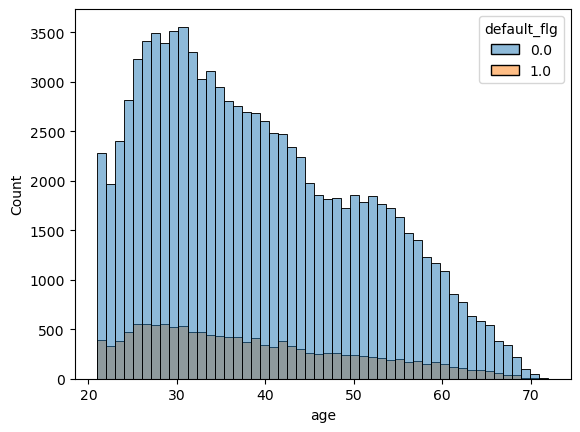

appl_rej_cnt


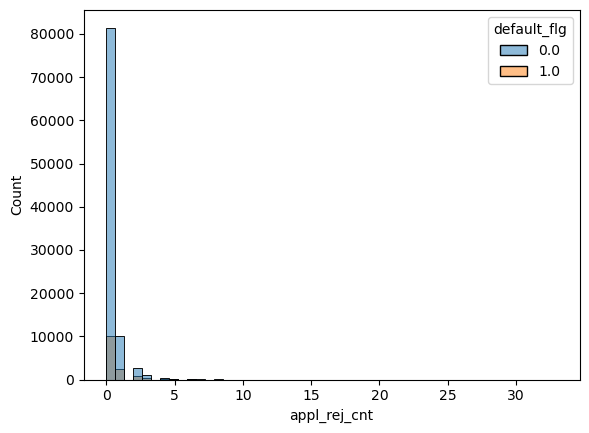

good_work_flg


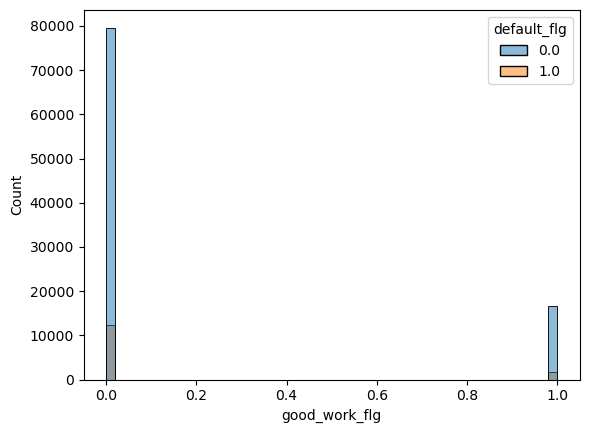

Score_bki


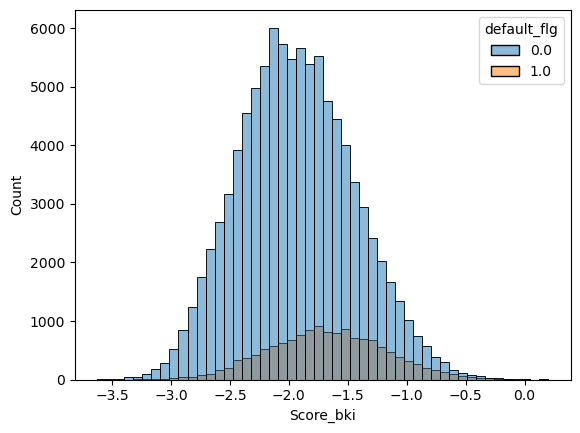

out_request_cnt


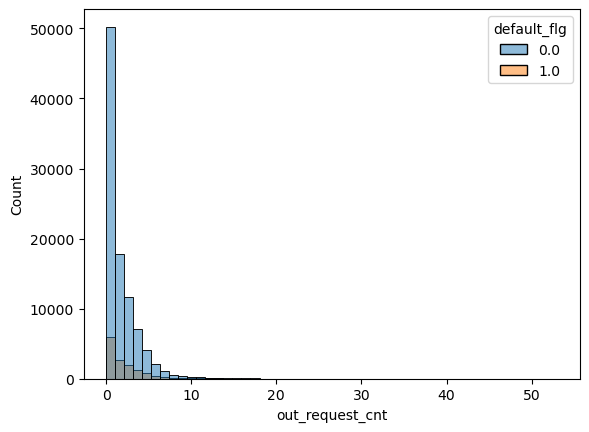

region_rating


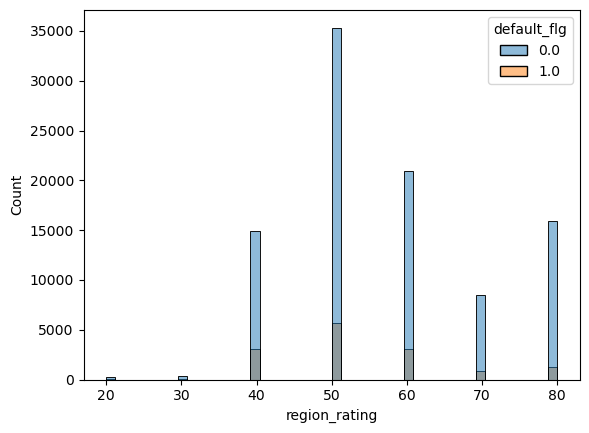

home_address_cd


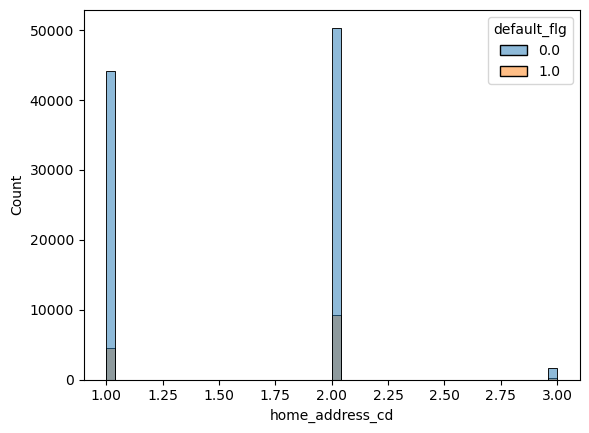

work_address_cd


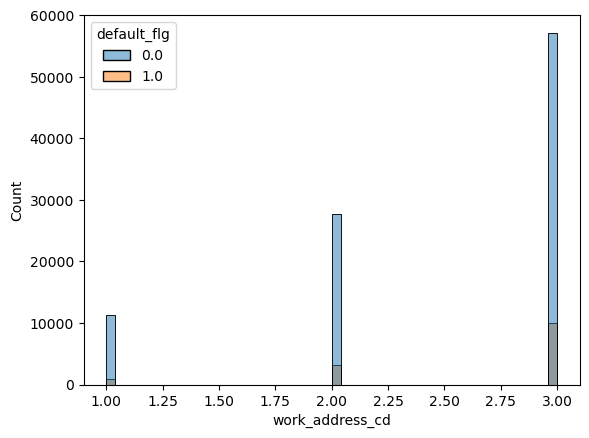

income


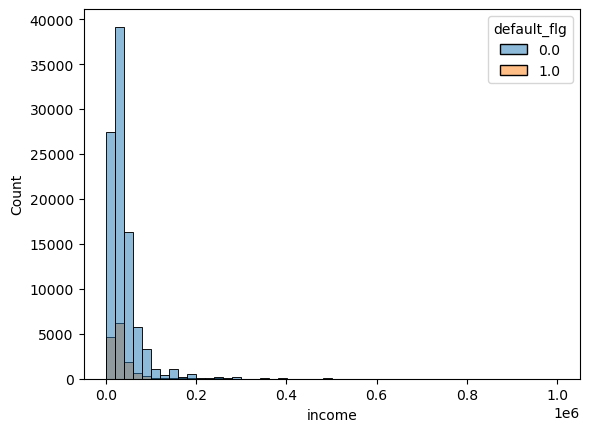

SNA


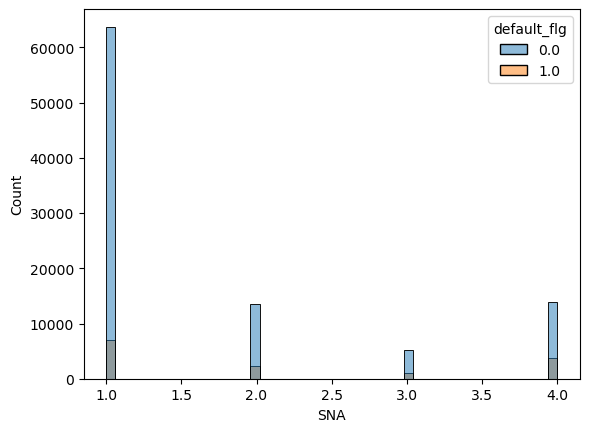

first_time_cd


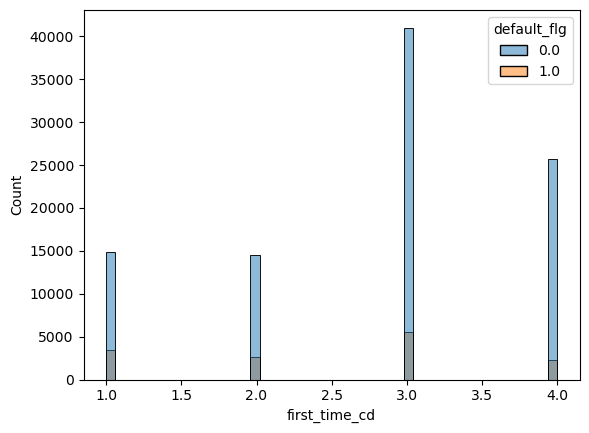

default_flg


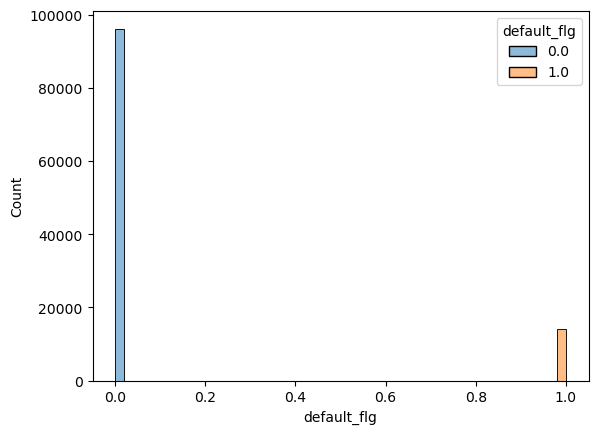

In [44]:
for i in num_df.columns:
    plt.figure()
    print(i)
    # plt.scatter(num_df[i],num_df['default_flg'])
    sns.histplot(data=num_df, x=i, hue='default_flg', bins=50)
    plt.show()

<Axes: xlabel='appl_rej_cnt', ylabel='Count'>

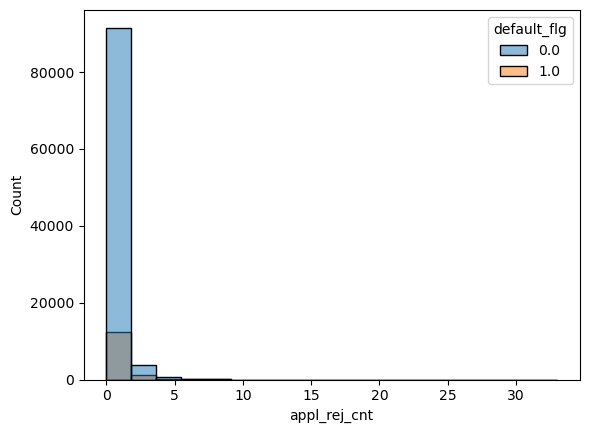

In [45]:
sns.histplot(data=num_df, x='appl_rej_cnt', hue='default_flg')

(0.0, 1000.0)

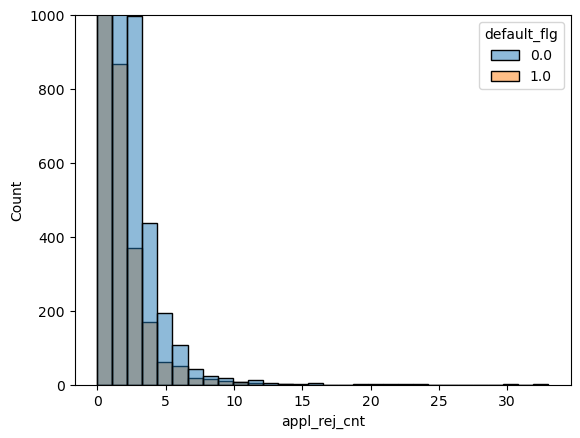

In [46]:
sns.histplot(data=num_df, x='appl_rej_cnt', hue='default_flg', bins=30)
plt.ylim(0, 1000)

(0.0, 100.0)

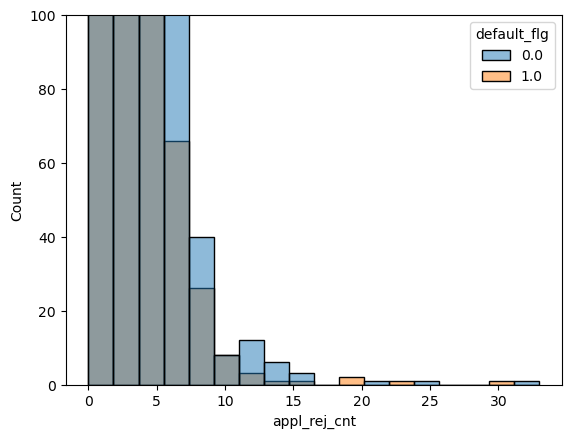

In [47]:
sns.histplot(data=num_df, x='appl_rej_cnt', hue='default_flg')
plt.ylim(0, 100)

<Axes: xlabel='income', ylabel='Count'>

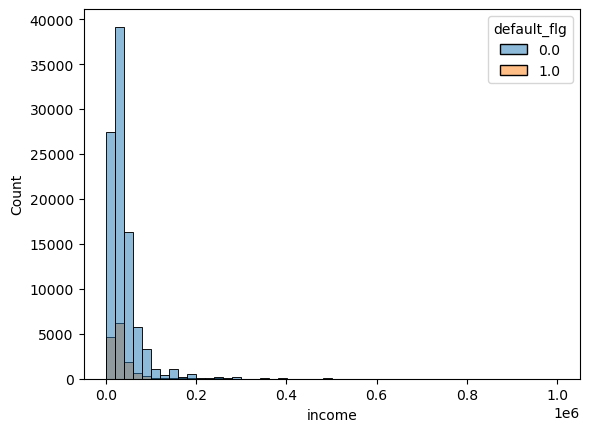

In [48]:
sns.histplot(data=num_df, x='income', hue='default_flg', bins=50)

(0.0, 10000.0)

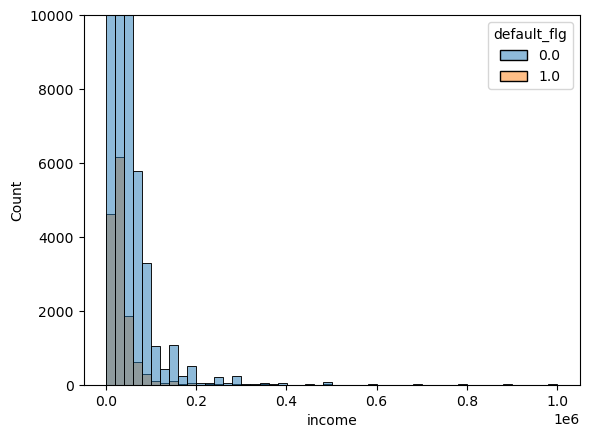

In [49]:
sns.histplot(data=num_df, x='income', hue='default_flg', bins=50)
plt.ylim(0, 10000)

## ТЕПЕРЬ МЫ ЗНАЕМ КАК БИТЬ ДАННЫЕ

    Age бьем на следующие интервалы:
    20-24
    24-32
    32-38
    38-44
    44-55
    55-60
    60-70



    appl_rejct бьем на следующие интервалы:
    01
    23
    45
    67
    89
    10+


    good_work_flg бьем на следующие интервалы:
    0,1

    Score_bki бьем 
    с шагом 0.5

    income бьем на следующие интервалы:
    до 0.06

    0.06 to 0.1

    0.1 TO 0.2

    >0.2




    first_time_cd бьем на следующие интервалы

    1 2 3 4

reg rating не дает нам прибавки

home work и 
adress и SNA также не дают прибавки

In [50]:
df

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,education_cd,default_flg,sample_cd
0,False,True,False,True,False,True,True,False,27,0,0,-1.917831,0,40,2,3,32000,1,4,SCH,0.0,train
1,True,False,True,False,True,False,True,False,26,0,0,-1.153144,2,60,2,3,50000,2,1,GRD,0.0,train
2,False,True,True,False,True,False,True,False,35,0,1,-1.732810,0,40,1,2,20000,4,3,SCH,0.0,train
3,True,False,True,False,True,False,True,False,35,0,1,-2.552133,2,20,2,3,80000,1,3,GRD,0.0,train
4,True,False,True,False,True,False,True,False,24,0,0,-1.914581,1,50,2,3,27000,1,2,UGR,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False,24,0,1,-2.001592,0,80,1,2,60000,1,3,UGR,NaN,test
205292,True,False,True,False,True,False,True,False,48,2,1,-2.088683,3,60,1,3,25000,3,2,SCH,NaN,test
205293,True,False,False,True,False,True,False,True,33,0,1,-2.140081,2,80,1,2,100000,1,4,GRD,NaN,test
205294,False,True,False,True,False,True,False,True,27,1,0,-1.552576,0,50,1,3,32500,1,3,PGR,NaN,test


# Разбиваем признаки

    Age
    20-24
    24-32
    32-38
    38-44
    44-55
    55-60
    60-70

In [51]:
df['age18-24'] = (df['age'] < 24).astype(int)
df['age24-32'] = ((df['age'] >= 24) & (df['age'] < 32)).astype(int)
df['age32-38'] = ((df['age'] >= 32) & (df['age'] < 38)).astype(int)

df['age38-44'] = ((df['age'] >= 38) & (df['age'] < 44)).astype(int)

df['age44-55'] = ((df['age'] >= 44) & (df['age'] < 55)).astype(int)
df['age55-60'] = ((df['age'] >= 55) & (df['age'] < 60)).astype(int)
df['age60+'] = (df['age'] > 60).astype(int)



    appl_rejct
    01
    23
    45
    67
    89
    10+

In [52]:
df['appl_rej_cnt_0-1'] = (df['appl_rej_cnt'] <= 1).astype(int)
df['appl_rej_cnt_2-3'] = ((df['appl_rej_cnt'] >= 2) & (df['appl_rej_cnt'] <= 3)).astype(int)
df['appl_rej_cnt_4-5'] = ((df['appl_rej_cnt'] >= 4) & (df['appl_rej_cnt'] <= 5)).astype(int)
df['appl_rej_cnt_6-7'] = ((df['appl_rej_cnt'] >= 6) & (df['appl_rej_cnt'] <= 7)).astype(int)
df['appl_rej_cnt_8-9'] = ((df['appl_rej_cnt'] >= 8) & (df['appl_rej_cnt'] <= 9)).astype(int)
df['appl_rej_cnt_10+'] = (df['appl_rej_cnt'] >= 10).astype(int)


In [53]:
df['good_work_flg_0'] = (df['good_work_flg'] == 0)
df['good_work_flg_1'] = (df['good_work_flg'] == 1)

    skhore bki бьем на 
    -3.5
    -3.5 -3
    -3   -2.5
    -2.5 -2
    -2 -1.5
    -1.5 -1
    -1 -0.5
    -0.5+

In [54]:
df['Score_bki_3.5'] = (df['Score_bki'] <= -3.5).astype(int)
df['Score_bki_3.5_3'] = ((df['Score_bki'] > -3.5) & (df['Score_bki'] <= -3)).astype(int)
df['Score_bki_3_2.5'] = ((df['Score_bki'] > -3) & (df['Score_bki'] <= -2.5)).astype(int)
df['Score_bki_2.5_2'] = ((df['Score_bki'] > -2.5) & (df['Score_bki'] <= -2)).astype(int)
df['Score_bki_2_1.5'] = ((df['Score_bki'] > -2) & (df['Score_bki'] <= -1.5)).astype(int)
df['Score_bki_1.5_1'] = ((df['Score_bki'] > -1.5) & (df['Score_bki'] <= -1)).astype(int)
df['Score_bki_1_0.5'] = ((df['Score_bki'] > -1) & (df['Score_bki'] <= 0.5)).astype(int)
df['Score_bki_0.5'] = (df['Score_bki'] >= -0.5).astype(int)


    income бьем на следующие интервалы:
    до 0.06

    0.06 to 0.1

    0.1 TO 0.2

    >0.2

In [55]:
df['income_to_6*10^4'] = (df['income'] <= 0.06 * 10 ** 6).astype(int)
df['income_from_6*10^4_to_10^5'] = ((df['income'] > 0.06 * 10 ** 6) & (df['income'] <= 0.1 * 10 ** 6)).astype(int)
df['income_from_10^5_to_2*10^5'] = ((df['income'] > 0.1 * 10 ** 6) & (df['income'] <= 0.2 * 10 ** 6)).astype(int)
df['income_from_2*10^5'] = (df['income'] >= 0.2 * 10 ** 6).astype(int)


out_request_cnt

In [56]:
df['out_request_cnt_0-1'] = (df['out_request_cnt'] <= 1).astype(int)
df['out_request_cnt_2-3'] = ((df['out_request_cnt'] >= 2) & (df['out_request_cnt'] <= 3)).astype(int)
df['out_request_cnt_4-5'] = ((df['out_request_cnt'] >= 4) & (df['out_request_cnt'] <= 5)).astype(int)
df['out_request_cnt_6-7'] = ((df['out_request_cnt'] >= 6) & (df['out_request_cnt'] <= 7)).astype(int)
df['out_request_cnt_8-9'] = ((df['out_request_cnt'] >= 8) & (df['out_request_cnt'] <= 9)).astype(int)
df['out_request_cnt_10+'] = (df['out_request_cnt'] >= 10).astype(int)

In [57]:
df['first_time_cd'].unique()

array([4, 1, 3, 2])

In [58]:
df['first_time_cd_1'] = (df['first_time_cd'] == 1)
df['first_time_cd_2'] = (df['first_time_cd'] == 2)
df['first_time_cd_3'] = (df['first_time_cd'] == 3)
df['first_time_cd_4'] = (df['first_time_cd'] == 4)

In [59]:
df

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,education_cd,default_flg,sample_cd,age18-24,age24-32,age32-38,age38-44,age44-55,age55-60,age60+,appl_rej_cnt_0-1,appl_rej_cnt_2-3,appl_rej_cnt_4-5,appl_rej_cnt_6-7,appl_rej_cnt_8-9,appl_rej_cnt_10+,good_work_flg_0,good_work_flg_1,Score_bki_3.5,Score_bki_3.5_3,Score_bki_3_2.5,Score_bki_2.5_2,Score_bki_2_1.5,Score_bki_1.5_1,Score_bki_1_0.5,Score_bki_0.5,income_to_6*10^4,income_from_6*10^4_to_10^5,income_from_10^5_to_2*10^5,income_from_2*10^5,out_request_cnt_0-1,out_request_cnt_2-3,out_request_cnt_4-5,out_request_cnt_6-7,out_request_cnt_8-9,out_request_cnt_10+,first_time_cd_1,first_time_cd_2,first_time_cd_3,first_time_cd_4
0,False,True,False,True,False,True,True,False,27,0,0,-1.917831,0,40,2,3,32000,1,4,SCH,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,False,True
1,True,False,True,False,True,False,True,False,26,0,0,-1.153144,2,60,2,3,50000,2,1,GRD,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,True,False,False,False
2,False,True,True,False,True,False,True,False,35,0,1,-1.732810,0,40,1,2,20000,4,3,SCH,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False
3,True,False,True,False,True,False,True,False,35,0,1,-2.552133,2,20,2,3,80000,1,3,GRD,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,True,False
4,True,False,True,False,True,False,True,False,24,0,0,-1.914581,1,50,2,3,27000,1,2,UGR,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False,24,0,1,-2.001592,0,80,1,2,60000,1,3,UGR,NaN,test,0,1,0,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False
205292,True,False,True,False,True,False,True,False,48,2,1,-2.088683,3,60,1,3,25000,3,2,SCH,NaN,test,0,0,0,0,1,0,0,0,1,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,True,False,False
205293,True,False,False,True,False,True,False,True,33,0,1,-2.140081,2,80,1,2,100000,1,4,GRD,NaN,test,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,False,True
205294,False,True,False,True,False,True,False,True,27,1,0,-1.552576,0,50,1,3,32500,1,3,PGR,NaN,test,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False


In [60]:
df.drop(columns=['age', 'good_work_flg', 'Score_bki', 'income', 'first_time_cd', 'SNA'], inplace=True)

In [61]:
df

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,appl_rej_cnt,out_request_cnt,region_rating,home_address_cd,work_address_cd,education_cd,default_flg,sample_cd,age18-24,age24-32,age32-38,age38-44,age44-55,age55-60,age60+,appl_rej_cnt_0-1,appl_rej_cnt_2-3,appl_rej_cnt_4-5,appl_rej_cnt_6-7,appl_rej_cnt_8-9,appl_rej_cnt_10+,good_work_flg_0,good_work_flg_1,Score_bki_3.5,Score_bki_3.5_3,Score_bki_3_2.5,Score_bki_2.5_2,Score_bki_2_1.5,Score_bki_1.5_1,Score_bki_1_0.5,Score_bki_0.5,income_to_6*10^4,income_from_6*10^4_to_10^5,income_from_10^5_to_2*10^5,income_from_2*10^5,out_request_cnt_0-1,out_request_cnt_2-3,out_request_cnt_4-5,out_request_cnt_6-7,out_request_cnt_8-9,out_request_cnt_10+,first_time_cd_1,first_time_cd_2,first_time_cd_3,first_time_cd_4
0,False,True,False,True,False,True,True,False,0,0,40,2,3,SCH,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,False,True
1,True,False,True,False,True,False,True,False,0,2,60,2,3,GRD,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,True,False,False,False
2,False,True,True,False,True,False,True,False,0,0,40,1,2,SCH,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False
3,True,False,True,False,True,False,True,False,0,2,20,2,3,GRD,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,True,False
4,True,False,True,False,True,False,True,False,0,1,50,2,3,UGR,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False,0,0,80,1,2,UGR,NaN,test,0,1,0,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False
205292,True,False,True,False,True,False,True,False,2,3,60,1,3,SCH,NaN,test,0,0,0,0,1,0,0,0,1,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,True,False,False
205293,True,False,False,True,False,True,False,True,0,2,80,1,2,GRD,NaN,test,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,False,True
205294,False,True,False,True,False,True,False,True,1,0,50,1,3,PGR,NaN,test,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False


In [62]:
df.drop(columns=['region_rating', 'home_address_cd', 'work_address_cd', 'appl_rej_cnt', 'out_request_cnt'],
        inplace=True)

In [63]:
df

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,education_cd,default_flg,sample_cd,age18-24,age24-32,age32-38,age38-44,age44-55,age55-60,age60+,appl_rej_cnt_0-1,appl_rej_cnt_2-3,appl_rej_cnt_4-5,appl_rej_cnt_6-7,appl_rej_cnt_8-9,appl_rej_cnt_10+,good_work_flg_0,good_work_flg_1,Score_bki_3.5,Score_bki_3.5_3,Score_bki_3_2.5,Score_bki_2.5_2,Score_bki_2_1.5,Score_bki_1.5_1,Score_bki_1_0.5,Score_bki_0.5,income_to_6*10^4,income_from_6*10^4_to_10^5,income_from_10^5_to_2*10^5,income_from_2*10^5,out_request_cnt_0-1,out_request_cnt_2-3,out_request_cnt_4-5,out_request_cnt_6-7,out_request_cnt_8-9,out_request_cnt_10+,first_time_cd_1,first_time_cd_2,first_time_cd_3,first_time_cd_4
0,False,True,False,True,False,True,True,False,SCH,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,False,True
1,True,False,True,False,True,False,True,False,GRD,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,True,False,False,False
2,False,True,True,False,True,False,True,False,SCH,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False
3,True,False,True,False,True,False,True,False,GRD,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,True,False
4,True,False,True,False,True,False,True,False,UGR,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,True,False,True,False,True,False,True,False,UGR,NaN,test,0,1,0,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False
205292,True,False,True,False,True,False,True,False,SCH,NaN,test,0,0,0,0,1,0,0,0,1,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,True,False,False
205293,True,False,False,True,False,True,False,True,GRD,NaN,test,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,False,True
205294,False,True,False,True,False,True,False,True,PGR,NaN,test,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False


In [64]:
df = df[df['sample_cd'] == 'train']

In [65]:
df

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,education_cd,default_flg,sample_cd,age18-24,age24-32,age32-38,age38-44,age44-55,age55-60,age60+,appl_rej_cnt_0-1,appl_rej_cnt_2-3,appl_rej_cnt_4-5,appl_rej_cnt_6-7,appl_rej_cnt_8-9,appl_rej_cnt_10+,good_work_flg_0,good_work_flg_1,Score_bki_3.5,Score_bki_3.5_3,Score_bki_3_2.5,Score_bki_2.5_2,Score_bki_2_1.5,Score_bki_1.5_1,Score_bki_1_0.5,Score_bki_0.5,income_to_6*10^4,income_from_6*10^4_to_10^5,income_from_10^5_to_2*10^5,income_from_2*10^5,out_request_cnt_0-1,out_request_cnt_2-3,out_request_cnt_4-5,out_request_cnt_6-7,out_request_cnt_8-9,out_request_cnt_10+,first_time_cd_1,first_time_cd_2,first_time_cd_3,first_time_cd_4
0,False,True,False,True,False,True,True,False,SCH,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,False,True
1,True,False,True,False,True,False,True,False,GRD,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,True,False,False,False
2,False,True,True,False,True,False,True,False,SCH,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False
3,True,False,True,False,True,False,True,False,GRD,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,True,False
4,True,False,True,False,True,False,True,False,UGR,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,False,True,False,True,False,True,True,False,SCH,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,True,False,False
110144,True,False,True,False,True,False,True,False,GRD,0.0,train,0,0,0,1,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False,True
110145,False,True,False,True,True,False,True,False,UGR,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,True,False,False,False
110146,True,False,False,True,True,False,True,False,SCH,1.0,train,0,0,0,0,1,0,0,1,0,0,0,0,0,True,False,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,True,False


In [66]:
dummy_df = pd.get_dummies(df['education_cd'])
df = pd.concat([df, dummy_df], axis=1)

In [67]:
df

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,education_cd,default_flg,sample_cd,age18-24,age24-32,age32-38,age38-44,age44-55,age55-60,age60+,appl_rej_cnt_0-1,appl_rej_cnt_2-3,appl_rej_cnt_4-5,appl_rej_cnt_6-7,appl_rej_cnt_8-9,appl_rej_cnt_10+,good_work_flg_0,good_work_flg_1,Score_bki_3.5,Score_bki_3.5_3,Score_bki_3_2.5,Score_bki_2.5_2,Score_bki_2_1.5,Score_bki_1.5_1,Score_bki_1_0.5,Score_bki_0.5,income_to_6*10^4,income_from_6*10^4_to_10^5,income_from_10^5_to_2*10^5,income_from_2*10^5,out_request_cnt_0-1,out_request_cnt_2-3,out_request_cnt_4-5,out_request_cnt_6-7,out_request_cnt_8-9,out_request_cnt_10+,first_time_cd_1,first_time_cd_2,first_time_cd_3,first_time_cd_4,ACD,GRD,PGR,SCH,UGR
0,False,True,False,True,False,True,True,False,SCH,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,False,True,False,False,False,True,False
1,True,False,True,False,True,False,True,False,GRD,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,True,False,False,False,False,True,False,False,False
2,False,True,True,False,True,False,True,False,SCH,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False,False,False,False,True,False
3,True,False,True,False,True,False,True,False,GRD,0.0,train,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,True,False,False,True,False,False,False
4,True,False,True,False,True,False,True,False,UGR,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,False,True,False,True,False,True,True,False,SCH,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,True,False,False,False,False,False,True,False
110144,True,False,True,False,True,False,True,False,GRD,0.0,train,0,0,0,1,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False,True,False,True,False,False,False
110145,False,True,False,True,True,False,True,False,UGR,0.0,train,0,1,0,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,True
110146,True,False,False,True,True,False,True,False,SCH,1.0,train,0,0,0,0,1,0,0,1,0,0,0,0,0,True,False,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,True,False,False,False,False,True,False


In [68]:
df.drop(columns=['education_cd'], inplace=True)
df.drop(columns=['sample_cd'], inplace=True)

In [69]:
df

,gender_cd_F,gender_cd_M,car_own_flg_N,car_own_flg_Y,car_type_flg_N,car_type_flg_Y,Air_flg_N,Air_flg_Y,default_flg,age18-24,age24-32,age32-38,age38-44,age44-55,age55-60,age60+,appl_rej_cnt_0-1,appl_rej_cnt_2-3,appl_rej_cnt_4-5,appl_rej_cnt_6-7,appl_rej_cnt_8-9,appl_rej_cnt_10+,good_work_flg_0,good_work_flg_1,Score_bki_3.5,Score_bki_3.5_3,Score_bki_3_2.5,Score_bki_2.5_2,Score_bki_2_1.5,Score_bki_1.5_1,Score_bki_1_0.5,Score_bki_0.5,income_to_6*10^4,income_from_6*10^4_to_10^5,income_from_10^5_to_2*10^5,income_from_2*10^5,out_request_cnt_0-1,out_request_cnt_2-3,out_request_cnt_4-5,out_request_cnt_6-7,out_request_cnt_8-9,out_request_cnt_10+,first_time_cd_1,first_time_cd_2,first_time_cd_3,first_time_cd_4,ACD,GRD,PGR,SCH,UGR
0,False,True,False,True,False,True,True,False,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,False,True,False,False,False,True,False
1,True,False,True,False,True,False,True,False,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,True,False,False,False,False,True,False,False,False
2,False,True,True,False,True,False,True,False,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,True,False,False,False,False,True,False
3,True,False,True,False,True,False,True,False,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False,False,True,False,False,True,False,False,False
4,True,False,True,False,True,False,True,False,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,False,True,False,True,False,True,True,False,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,True,False,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,True,False,False,False,False,False,True,False
110144,True,False,True,False,True,False,True,False,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,True,False,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False,True,False,True,False,False,False
110145,False,True,False,True,True,False,True,False,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,False,True,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,True
110146,True,False,False,True,True,False,True,False,1.0,0,0,0,0,1,0,0,1,0,0,0,0,0,True,False,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,True,False,False,False,False,True,False


# выбираем лучшую модель

In [70]:
import time
# Sklearn
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
import numpy as np

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB


In [71]:
X = df.drop(columns=['default_flg'])

In [72]:
y = df['default_flg']

In [73]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8, test_size=0.2, random_state=0)


In [74]:
classifiers = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "RandomForest": RandomForestClassifier(random_state=0),
    "CatBoost": CatBoostClassifier(random_state=0, verbose=False),
}

# Grids for grid search
LR_grid = {'penalty': ['l1', 'l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [500, 1000]}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
           'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
                'max_depth': [4, 8, 12],
                'learning_rate': [0.05, 0.1, 0.15]}

# Dictionary of all grids
grid = {
    "LogisticRegression": LR_grid,
    "RandomForest": RF_grid,
    "XGBoost": boosted_grid,
    "LGBM": boosted_grid,
    "CatBoost": boosted_grid,
}


In [75]:
model = LogisticRegression()

In [76]:
clf = GridSearchCV(model, LR_grid, n_jobs=-1, cv=5)

In [77]:
clf.fit(X_train, y_train)

/Users/arkadiy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arkadiy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arkadiy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/arkadiy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_l

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
                         'max_iter': [500, 1000], 'penalty': ['l1', 'l2']})

In [78]:
clf.best_params_

{'C': 0.5, 'max_iter': 500, 'penalty': 'l2'}

In [79]:
predictions = clf.predict(X_valid)
print(accuracy_score(y_valid, predictions))

0.8731275533363595


In [80]:
model = RandomForestClassifier()
clf = GridSearchCV(model, RF_grid, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=12)

In [81]:
predictions = clf.predict(X_valid)
print(accuracy_score(y_valid, predictions))

0.8729913753971856


In [82]:
model = CatBoostClassifier()
clf = GridSearchCV(model, boosted_grid, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
clf.best_estimator_

0:	learn: 0.6573647	total: 113ms	remaining: 5.54s
1:	learn: 0.6246209	total: 151ms	remaining: 3.61s
2:	learn: 0.5956610	total: 193ms	remaining: 3.02s
3:	learn: 0.5710595	total: 228ms	remaining: 2.62s
4:	learn: 0.5483867	total: 258ms	remaining: 2.32s
5:	learn: 0.5277027	total: 278ms	remaining: 2.04s
6:	learn: 0.5092290	total: 298ms	remaining: 1.83s
7:	learn: 0.4929581	total: 323ms	remaining: 1.69s
8:	learn: 0.4788850	total: 349ms	remaining: 1.59s
9:	learn: 0.4667481	total: 387ms	remaining: 1.55s
10:	learn: 0.4547337	total: 428ms	remaining: 1.52s
11:	learn: 0.4443024	total: 461ms	remaining: 1.46s
12:	learn: 0.4358053	total: 522ms	remaining: 1.49s
13:	learn: 0.4283340	total: 541ms	remaining: 1.39s
14:	learn: 0.4211794	total: 579ms	remaining: 1.35s
15:	learn: 0.4152174	total: 605ms	remaining: 1.28s
16:	learn: 0.4098025	total: 640ms	remaining: 1.24s
17:	learn: 0.4048390	total: 672ms	remaining: 1.19s
18:	learn: 0.4004520	total: 699ms	remaining: 1.14s
19:	learn: 0.3964329	total: 724ms	remaini

0:	learn: 0.6566741	total: 111ms	remaining: 11s
1:	learn: 0.6247924	total: 153ms	remaining: 7.49s
2:	learn: 0.5951418	total: 175ms	remaining: 5.65s
3:	learn: 0.5697642	total: 195ms	remaining: 4.68s
4:	learn: 0.5463924	total: 214ms	remaining: 4.08s
5:	learn: 0.5268395	total: 241ms	remaining: 3.77s
6:	learn: 0.5094723	total: 257ms	remaining: 3.41s
7:	learn: 0.4936187	total: 286ms	remaining: 3.29s
8:	learn: 0.4800077	total: 329ms	remaining: 3.33s
9:	learn: 0.4676814	total: 379ms	remaining: 3.41s
10:	learn: 0.4565298	total: 430ms	remaining: 3.48s
11:	learn: 0.4456945	total: 460ms	remaining: 3.37s
12:	learn: 0.4364501	total: 513ms	remaining: 3.43s
13:	learn: 0.4289154	total: 559ms	remaining: 3.43s
14:	learn: 0.4216567	total: 606ms	remaining: 3.43s
15:	learn: 0.4152941	total: 627ms	remaining: 3.29s
16:	learn: 0.4092963	total: 644ms	remaining: 3.15s
17:	learn: 0.4042380	total: 674ms	remaining: 3.07s
18:	learn: 0.3992876	total: 696ms	remaining: 2.97s
19:	learn: 0.3949889	total: 730ms	remaining

0:	learn: 0.6566741	total: 97.7ms	remaining: 4.79s
1:	learn: 0.6247924	total: 127ms	remaining: 3.05s
2:	learn: 0.5951418	total: 188ms	remaining: 2.95s
3:	learn: 0.5697642	total: 214ms	remaining: 2.46s
4:	learn: 0.5463924	total: 257ms	remaining: 2.31s
5:	learn: 0.5268395	total: 280ms	remaining: 2.05s
6:	learn: 0.5094723	total: 299ms	remaining: 1.84s
7:	learn: 0.4936187	total: 334ms	remaining: 1.75s
8:	learn: 0.4800077	total: 350ms	remaining: 1.59s
9:	learn: 0.4676814	total: 380ms	remaining: 1.52s
10:	learn: 0.4565298	total: 413ms	remaining: 1.46s
11:	learn: 0.4456945	total: 451ms	remaining: 1.43s
12:	learn: 0.4364501	total: 476ms	remaining: 1.35s
13:	learn: 0.4289154	total: 520ms	remaining: 1.34s
14:	learn: 0.4216567	total: 549ms	remaining: 1.28s
15:	learn: 0.4152941	total: 584ms	remaining: 1.24s
16:	learn: 0.4092963	total: 611ms	remaining: 1.19s
17:	learn: 0.4042380	total: 639ms	remaining: 1.14s
18:	learn: 0.3992876	total: 669ms	remaining: 1.09s
19:	learn: 0.3949889	total: 701ms	remain

0:	learn: 0.6566164	total: 81.5ms	remaining: 8.06s
1:	learn: 0.6246986	total: 124ms	remaining: 6.05s
2:	learn: 0.5960012	total: 174ms	remaining: 5.61s
3:	learn: 0.5705155	total: 208ms	remaining: 4.99s
4:	learn: 0.5471439	total: 250ms	remaining: 4.74s
5:	learn: 0.5275426	total: 304ms	remaining: 4.77s
6:	learn: 0.5096510	total: 334ms	remaining: 4.44s
7:	learn: 0.4937669	total: 364ms	remaining: 4.19s
8:	learn: 0.4801327	total: 410ms	remaining: 4.14s
9:	learn: 0.4670221	total: 438ms	remaining: 3.94s
10:	learn: 0.4556815	total: 460ms	remaining: 3.72s
11:	learn: 0.4461799	total: 494ms	remaining: 3.62s
12:	learn: 0.4365784	total: 526ms	remaining: 3.52s
13:	learn: 0.4285961	total: 541ms	remaining: 3.32s
14:	learn: 0.4213877	total: 573ms	remaining: 3.25s
15:	learn: 0.4153761	total: 599ms	remaining: 3.14s
16:	learn: 0.4102868	total: 635ms	remaining: 3.1s
17:	learn: 0.4053126	total: 668ms	remaining: 3.04s
18:	learn: 0.4004696	total: 690ms	remaining: 2.94s
19:	learn: 0.3961069	total: 733ms	remaini

0:	learn: 0.6573647	total: 87.2ms	remaining: 8.63s
1:	learn: 0.6246209	total: 114ms	remaining: 5.6s
2:	learn: 0.5956610	total: 153ms	remaining: 4.94s
3:	learn: 0.5710595	total: 176ms	remaining: 4.21s
4:	learn: 0.5483867	total: 201ms	remaining: 3.81s
5:	learn: 0.5277027	total: 236ms	remaining: 3.7s
6:	learn: 0.5092290	total: 273ms	remaining: 3.62s
7:	learn: 0.4929581	total: 311ms	remaining: 3.58s
8:	learn: 0.4788850	total: 348ms	remaining: 3.52s
9:	learn: 0.4667481	total: 393ms	remaining: 3.54s
10:	learn: 0.4547337	total: 423ms	remaining: 3.42s
11:	learn: 0.4443024	total: 453ms	remaining: 3.32s
12:	learn: 0.4358053	total: 480ms	remaining: 3.21s
13:	learn: 0.4283340	total: 503ms	remaining: 3.09s
14:	learn: 0.4211794	total: 537ms	remaining: 3.04s
15:	learn: 0.4152174	total: 572ms	remaining: 3s
16:	learn: 0.4098025	total: 602ms	remaining: 2.94s
17:	learn: 0.4048390	total: 633ms	remaining: 2.88s
18:	learn: 0.4004520	total: 675ms	remaining: 2.88s
19:	learn: 0.3964329	total: 699ms	remaining: 

0:	learn: 0.6566164	total: 111ms	remaining: 5.42s
1:	learn: 0.6246986	total: 143ms	remaining: 3.42s
2:	learn: 0.5960012	total: 177ms	remaining: 2.77s
3:	learn: 0.5705155	total: 223ms	remaining: 2.56s
4:	learn: 0.5471439	total: 243ms	remaining: 2.18s
5:	learn: 0.5275426	total: 266ms	remaining: 1.95s
6:	learn: 0.5096510	total: 282ms	remaining: 1.73s
7:	learn: 0.4937669	total: 311ms	remaining: 1.63s
8:	learn: 0.4801327	total: 336ms	remaining: 1.53s
9:	learn: 0.4670221	total: 359ms	remaining: 1.44s
10:	learn: 0.4556815	total: 384ms	remaining: 1.36s
11:	learn: 0.4461799	total: 421ms	remaining: 1.33s
12:	learn: 0.4365784	total: 460ms	remaining: 1.31s
13:	learn: 0.4285961	total: 491ms	remaining: 1.26s
14:	learn: 0.4213877	total: 517ms	remaining: 1.21s
15:	learn: 0.4153761	total: 558ms	remaining: 1.19s
16:	learn: 0.4102868	total: 612ms	remaining: 1.19s
17:	learn: 0.4053126	total: 652ms	remaining: 1.16s
18:	learn: 0.4004696	total: 685ms	remaining: 1.12s
19:	learn: 0.3961069	total: 713ms	remaini

0:	learn: 0.6566378	total: 112ms	remaining: 5.49s
1:	learn: 0.6247478	total: 148ms	remaining: 3.54s
2:	learn: 0.5961485	total: 186ms	remaining: 2.91s
3:	learn: 0.5706718	total: 217ms	remaining: 2.49s
4:	learn: 0.5473697	total: 251ms	remaining: 2.26s
5:	learn: 0.5277482	total: 279ms	remaining: 2.04s
6:	learn: 0.5101244	total: 297ms	remaining: 1.82s
7:	learn: 0.4947218	total: 329ms	remaining: 1.73s
8:	learn: 0.4810567	total: 359ms	remaining: 1.64s
9:	learn: 0.4685910	total: 391ms	remaining: 1.56s
10:	learn: 0.4566814	total: 428ms	remaining: 1.52s
11:	learn: 0.4464775	total: 463ms	remaining: 1.47s
12:	learn: 0.4369478	total: 505ms	remaining: 1.44s
13:	learn: 0.4286042	total: 531ms	remaining: 1.36s
14:	learn: 0.4214274	total: 562ms	remaining: 1.31s
15:	learn: 0.4154046	total: 625ms	remaining: 1.33s
16:	learn: 0.4098048	total: 656ms	remaining: 1.27s
17:	learn: 0.4045279	total: 685ms	remaining: 1.22s
18:	learn: 0.4003527	total: 710ms	remaining: 1.16s
19:	learn: 0.3961257	total: 740ms	remaini

0:	learn: 0.6567494	total: 107ms	remaining: 5.22s
1:	learn: 0.6242471	total: 138ms	remaining: 3.31s
2:	learn: 0.5963596	total: 174ms	remaining: 2.72s
3:	learn: 0.5701542	total: 205ms	remaining: 2.35s
4:	learn: 0.5481837	total: 229ms	remaining: 2.06s
5:	learn: 0.5277336	total: 257ms	remaining: 1.88s
6:	learn: 0.5096472	total: 279ms	remaining: 1.71s
7:	learn: 0.4939625	total: 321ms	remaining: 1.68s
8:	learn: 0.4801623	total: 394ms	remaining: 1.8s
9:	learn: 0.4677391	total: 434ms	remaining: 1.74s
10:	learn: 0.4563067	total: 475ms	remaining: 1.68s
11:	learn: 0.4461535	total: 529ms	remaining: 1.67s
12:	learn: 0.4375280	total: 552ms	remaining: 1.57s
13:	learn: 0.4300453	total: 577ms	remaining: 1.48s
14:	learn: 0.4230403	total: 602ms	remaining: 1.41s
15:	learn: 0.4166188	total: 628ms	remaining: 1.33s
16:	learn: 0.4109760	total: 662ms	remaining: 1.28s
17:	learn: 0.4052863	total: 691ms	remaining: 1.23s
18:	learn: 0.4004871	total: 723ms	remaining: 1.18s
19:	learn: 0.3964499	total: 755ms	remainin

121:	learn: 0.3526734	total: 2.71s	remaining: 1.74s
122:	learn: 0.3526338	total: 2.74s	remaining: 1.72s
123:	learn: 0.3526126	total: 2.77s	remaining: 1.7s
124:	learn: 0.3525892	total: 2.78s	remaining: 1.67s
125:	learn: 0.3525580	total: 2.81s	remaining: 1.65s
126:	learn: 0.3525270	total: 2.83s	remaining: 1.63s
127:	learn: 0.3525066	total: 2.85s	remaining: 1.6s
128:	learn: 0.3524831	total: 2.87s	remaining: 1.58s
129:	learn: 0.3524593	total: 2.89s	remaining: 1.56s
130:	learn: 0.3524360	total: 2.91s	remaining: 1.53s
131:	learn: 0.3523978	total: 2.94s	remaining: 1.51s
132:	learn: 0.3523750	total: 2.96s	remaining: 1.49s
133:	learn: 0.3523596	total: 2.98s	remaining: 1.47s
134:	learn: 0.3523334	total: 3s	remaining: 1.45s
135:	learn: 0.3523106	total: 3.02s	remaining: 1.42s
136:	learn: 0.3522893	total: 3.05s	remaining: 1.4s
137:	learn: 0.3522711	total: 3.07s	remaining: 1.38s
138:	learn: 0.3522415	total: 3.09s	remaining: 1.35s
139:	learn: 0.3522204	total: 3.11s	remaining: 1.33s
140:	learn: 0.3522

21:	learn: 0.3841562	total: 675ms	remaining: 859ms
22:	learn: 0.3810891	total: 705ms	remaining: 828ms
23:	learn: 0.3785304	total: 733ms	remaining: 794ms
24:	learn: 0.3758614	total: 766ms	remaining: 766ms
25:	learn: 0.3737740	total: 800ms	remaining: 739ms
26:	learn: 0.3716101	total: 827ms	remaining: 705ms
27:	learn: 0.3698108	total: 854ms	remaining: 671ms
28:	learn: 0.3679905	total: 884ms	remaining: 640ms
29:	learn: 0.3665875	total: 919ms	remaining: 613ms
30:	learn: 0.3652922	total: 963ms	remaining: 590ms
31:	learn: 0.3641431	total: 994ms	remaining: 559ms
32:	learn: 0.3630278	total: 1.02s	remaining: 527ms
33:	learn: 0.3622277	total: 1.06s	remaining: 499ms
34:	learn: 0.3613240	total: 1.11s	remaining: 475ms
35:	learn: 0.3604112	total: 1.16s	remaining: 451ms
36:	learn: 0.3598146	total: 1.18s	remaining: 416ms
37:	learn: 0.3590186	total: 1.22s	remaining: 385ms
38:	learn: 0.3584473	total: 1.25s	remaining: 354ms
39:	learn: 0.3576365	total: 1.3s	remaining: 325ms
40:	learn: 0.3570492	total: 1.35

20:	learn: 0.3877892	total: 652ms	remaining: 900ms
21:	learn: 0.3842392	total: 687ms	remaining: 875ms
22:	learn: 0.3811493	total: 716ms	remaining: 840ms
23:	learn: 0.3786211	total: 741ms	remaining: 802ms
24:	learn: 0.3760250	total: 770ms	remaining: 770ms
25:	learn: 0.3737547	total: 797ms	remaining: 736ms
26:	learn: 0.3718132	total: 827ms	remaining: 705ms
27:	learn: 0.3699838	total: 857ms	remaining: 673ms
28:	learn: 0.3684751	total: 897ms	remaining: 649ms
29:	learn: 0.3668788	total: 930ms	remaining: 620ms
30:	learn: 0.3654621	total: 962ms	remaining: 589ms
31:	learn: 0.3643110	total: 994ms	remaining: 559ms
32:	learn: 0.3631906	total: 1.03s	remaining: 534ms
33:	learn: 0.3621921	total: 1.09s	remaining: 513ms
34:	learn: 0.3612198	total: 1.12s	remaining: 479ms
35:	learn: 0.3603031	total: 1.15s	remaining: 447ms
36:	learn: 0.3597176	total: 1.18s	remaining: 415ms
37:	learn: 0.3589271	total: 1.21s	remaining: 383ms
38:	learn: 0.3583587	total: 1.25s	remaining: 352ms
39:	learn: 0.3575832	total: 1.2

170:	learn: 0.3507771	total: 3.76s	remaining: 637ms
171:	learn: 0.3507625	total: 3.78s	remaining: 615ms
172:	learn: 0.3507397	total: 3.79s	remaining: 592ms
173:	learn: 0.3507269	total: 3.82s	remaining: 571ms
174:	learn: 0.3507090	total: 3.84s	remaining: 549ms
175:	learn: 0.3506927	total: 3.86s	remaining: 526ms
176:	learn: 0.3506801	total: 3.88s	remaining: 504ms
177:	learn: 0.3506544	total: 3.91s	remaining: 483ms
178:	learn: 0.3506454	total: 3.93s	remaining: 461ms
179:	learn: 0.3506360	total: 3.96s	remaining: 440ms
180:	learn: 0.3506212	total: 3.97s	remaining: 417ms
181:	learn: 0.3506038	total: 3.99s	remaining: 395ms
182:	learn: 0.3505797	total: 4.01s	remaining: 373ms
183:	learn: 0.3505661	total: 4.03s	remaining: 350ms
184:	learn: 0.3505527	total: 4.05s	remaining: 328ms
185:	learn: 0.3505406	total: 4.08s	remaining: 307ms
186:	learn: 0.3505162	total: 4.09s	remaining: 285ms
187:	learn: 0.3505063	total: 4.12s	remaining: 263ms
188:	learn: 0.3504798	total: 4.15s	remaining: 241ms
189:	learn: 

71:	learn: 0.3550509	total: 2.13s	remaining: 3.79s
72:	learn: 0.3549693	total: 2.15s	remaining: 3.75s
73:	learn: 0.3548842	total: 2.19s	remaining: 3.73s
74:	learn: 0.3548074	total: 2.23s	remaining: 3.71s
75:	learn: 0.3547173	total: 2.25s	remaining: 3.68s
76:	learn: 0.3546295	total: 2.28s	remaining: 3.64s
77:	learn: 0.3545562	total: 2.31s	remaining: 3.62s
78:	learn: 0.3545056	total: 2.37s	remaining: 3.62s
79:	learn: 0.3544378	total: 2.4s	remaining: 3.6s
80:	learn: 0.3543831	total: 2.43s	remaining: 3.57s
81:	learn: 0.3542735	total: 2.46s	remaining: 3.55s
82:	learn: 0.3542069	total: 2.5s	remaining: 3.52s
83:	learn: 0.3541673	total: 2.53s	remaining: 3.5s
84:	learn: 0.3541164	total: 2.57s	remaining: 3.47s
85:	learn: 0.3540558	total: 2.6s	remaining: 3.45s
86:	learn: 0.3540039	total: 2.64s	remaining: 3.43s
87:	learn: 0.3539613	total: 2.67s	remaining: 3.4s
88:	learn: 0.3538851	total: 2.71s	remaining: 3.39s
89:	learn: 0.3537981	total: 2.77s	remaining: 3.38s
90:	learn: 0.3537355	total: 2.8s	rema

71:	learn: 0.3484587	total: 2.75s	remaining: 1.07s
72:	learn: 0.3482896	total: 2.81s	remaining: 1.04s
73:	learn: 0.3481450	total: 2.89s	remaining: 1.01s
74:	learn: 0.3480273	total: 2.93s	remaining: 977ms
75:	learn: 0.3479116	total: 2.99s	remaining: 944ms
76:	learn: 0.3478205	total: 3.06s	remaining: 915ms
77:	learn: 0.3476936	total: 3.12s	remaining: 880ms
78:	learn: 0.3475984	total: 3.17s	remaining: 844ms
79:	learn: 0.3475051	total: 3.23s	remaining: 807ms
80:	learn: 0.3474203	total: 3.29s	remaining: 772ms
81:	learn: 0.3473032	total: 3.37s	remaining: 739ms
82:	learn: 0.3472319	total: 3.47s	remaining: 711ms
83:	learn: 0.3471309	total: 3.52s	remaining: 670ms
84:	learn: 0.3470320	total: 3.56s	remaining: 628ms
85:	learn: 0.3469268	total: 3.6s	remaining: 586ms
86:	learn: 0.3468689	total: 3.65s	remaining: 545ms
87:	learn: 0.3467994	total: 3.7s	remaining: 504ms
88:	learn: 0.3467359	total: 3.75s	remaining: 464ms
89:	learn: 0.3465920	total: 3.81s	remaining: 423ms
90:	learn: 0.3464810	total: 3.87s

71:	learn: 0.3486258	total: 2.58s	remaining: 1s
72:	learn: 0.3484461	total: 2.62s	remaining: 969ms
73:	learn: 0.3483030	total: 2.65s	remaining: 931ms
74:	learn: 0.3482271	total: 2.68s	remaining: 895ms
75:	learn: 0.3480932	total: 2.73s	remaining: 862ms
76:	learn: 0.3479194	total: 2.77s	remaining: 826ms
77:	learn: 0.3477923	total: 2.8s	remaining: 791ms
78:	learn: 0.3477080	total: 2.84s	remaining: 754ms
79:	learn: 0.3475983	total: 2.87s	remaining: 718ms
80:	learn: 0.3475240	total: 2.92s	remaining: 684ms
81:	learn: 0.3473926	total: 2.96s	remaining: 650ms
82:	learn: 0.3472975	total: 3.01s	remaining: 616ms
83:	learn: 0.3472105	total: 3.08s	remaining: 587ms
84:	learn: 0.3471401	total: 3.11s	remaining: 549ms
85:	learn: 0.3470332	total: 3.15s	remaining: 512ms
86:	learn: 0.3469444	total: 3.19s	remaining: 477ms
87:	learn: 0.3467838	total: 3.24s	remaining: 442ms
88:	learn: 0.3467346	total: 3.29s	remaining: 406ms
89:	learn: 0.3466282	total: 3.33s	remaining: 370ms
90:	learn: 0.3465588	total: 3.36s	r

190:	learn: 0.3396417	total: 6.11s	remaining: 288ms
191:	learn: 0.3395490	total: 6.13s	remaining: 256ms
192:	learn: 0.3394801	total: 6.17s	remaining: 224ms
193:	learn: 0.3394468	total: 6.2s	remaining: 192ms
194:	learn: 0.3394206	total: 6.23s	remaining: 160ms
195:	learn: 0.3393817	total: 6.27s	remaining: 128ms
196:	learn: 0.3393127	total: 6.31s	remaining: 96ms
197:	learn: 0.3392685	total: 6.34s	remaining: 64.1ms
198:	learn: 0.3392174	total: 6.37s	remaining: 32ms
199:	learn: 0.3391389	total: 6.4s	remaining: 0us
0:	learn: 0.6541716	total: 40.7ms	remaining: 1.99s
1:	learn: 0.6214615	total: 73.3ms	remaining: 1.76s
2:	learn: 0.5920778	total: 123ms	remaining: 1.93s
3:	learn: 0.5656681	total: 166ms	remaining: 1.91s
4:	learn: 0.5408215	total: 311ms	remaining: 2.8s
5:	learn: 0.5194478	total: 447ms	remaining: 3.28s
6:	learn: 0.5007976	total: 585ms	remaining: 3.59s
7:	learn: 0.4844131	total: 730ms	remaining: 3.83s
8:	learn: 0.4706048	total: 791ms	remaining: 3.6s
9:	learn: 0.4574442	total: 954ms	re

40:	learn: 0.3479224	total: 3.45s	remaining: 757ms
41:	learn: 0.3471495	total: 3.55s	remaining: 676ms
42:	learn: 0.3464076	total: 3.65s	remaining: 595ms
43:	learn: 0.3457454	total: 3.76s	remaining: 513ms
44:	learn: 0.3446202	total: 3.87s	remaining: 430ms
45:	learn: 0.3441110	total: 3.97s	remaining: 346ms
46:	learn: 0.3431798	total: 4.09s	remaining: 261ms
47:	learn: 0.3424719	total: 4.22s	remaining: 176ms
48:	learn: 0.3419552	total: 4.36s	remaining: 89.1ms
49:	learn: 0.3417916	total: 4.41s	remaining: 0us
0:	learn: 0.6573647	total: 44ms	remaining: 4.35s
1:	learn: 0.6235280	total: 166ms	remaining: 8.13s
2:	learn: 0.5927303	total: 233ms	remaining: 7.55s
3:	learn: 0.5667463	total: 273ms	remaining: 6.56s
4:	learn: 0.5414965	total: 356ms	remaining: 6.77s
5:	learn: 0.5201850	total: 484ms	remaining: 7.59s
6:	learn: 0.5036449	total: 530ms	remaining: 7.04s
7:	learn: 0.4873135	total: 577ms	remaining: 6.63s
8:	learn: 0.4741616	total: 596ms	remaining: 6.03s
9:	learn: 0.4620027	total: 651ms	remaining

189:	learn: 0.3399425	total: 7.99s	remaining: 420ms
190:	learn: 0.3398769	total: 8.03s	remaining: 378ms
191:	learn: 0.3398401	total: 8.08s	remaining: 337ms
192:	learn: 0.3397248	total: 8.11s	remaining: 294ms
193:	learn: 0.3396634	total: 8.16s	remaining: 252ms
194:	learn: 0.3396047	total: 8.22s	remaining: 211ms
195:	learn: 0.3395309	total: 8.27s	remaining: 169ms
196:	learn: 0.3394672	total: 8.33s	remaining: 127ms
197:	learn: 0.3394183	total: 8.39s	remaining: 84.7ms
198:	learn: 0.3393184	total: 8.43s	remaining: 42.4ms
199:	learn: 0.3392702	total: 8.48s	remaining: 0us
0:	learn: 0.6539659	total: 33.9ms	remaining: 3.36s
1:	learn: 0.6211913	total: 74.7ms	remaining: 3.66s
2:	learn: 0.5916983	total: 122ms	remaining: 3.93s
3:	learn: 0.5652156	total: 189ms	remaining: 4.55s
4:	learn: 0.5400893	total: 319ms	remaining: 6.06s
5:	learn: 0.5186314	total: 469ms	remaining: 7.35s
6:	learn: 0.5000267	total: 606ms	remaining: 8.04s
7:	learn: 0.4851253	total: 637ms	remaining: 7.32s
8:	learn: 0.4713026	total:

91:	learn: 0.3469092	total: 3.49s	remaining: 4.09s
92:	learn: 0.3468552	total: 3.54s	remaining: 4.07s
93:	learn: 0.3467233	total: 3.59s	remaining: 4.04s
94:	learn: 0.3466685	total: 3.63s	remaining: 4.01s
95:	learn: 0.3465963	total: 3.68s	remaining: 3.98s
96:	learn: 0.3465086	total: 3.73s	remaining: 3.96s
97:	learn: 0.3464140	total: 3.79s	remaining: 3.94s
98:	learn: 0.3463482	total: 3.85s	remaining: 3.93s
99:	learn: 0.3462824	total: 3.9s	remaining: 3.9s
100:	learn: 0.3462113	total: 3.95s	remaining: 3.87s
101:	learn: 0.3461546	total: 4.01s	remaining: 3.85s
102:	learn: 0.3460230	total: 4.08s	remaining: 3.84s
103:	learn: 0.3459678	total: 4.13s	remaining: 3.81s
104:	learn: 0.3458370	total: 4.18s	remaining: 3.78s
105:	learn: 0.3458093	total: 4.24s	remaining: 3.76s
106:	learn: 0.3457461	total: 4.31s	remaining: 3.75s
107:	learn: 0.3456709	total: 4.37s	remaining: 3.72s
108:	learn: 0.3455513	total: 4.42s	remaining: 3.69s
109:	learn: 0.3454234	total: 4.47s	remaining: 3.66s
110:	learn: 0.3453446	t

11:	learn: 0.3821200	total: 344ms	remaining: 1.09s
12:	learn: 0.3774992	total: 376ms	remaining: 1.07s
13:	learn: 0.3739295	total: 401ms	remaining: 1.03s
14:	learn: 0.3710350	total: 423ms	remaining: 987ms
15:	learn: 0.3684884	total: 449ms	remaining: 955ms
16:	learn: 0.3666142	total: 473ms	remaining: 918ms
17:	learn: 0.3648456	total: 497ms	remaining: 884ms
18:	learn: 0.3630322	total: 532ms	remaining: 868ms
19:	learn: 0.3620417	total: 578ms	remaining: 867ms
20:	learn: 0.3607802	total: 602ms	remaining: 831ms
21:	learn: 0.3597709	total: 629ms	remaining: 800ms
22:	learn: 0.3589080	total: 674ms	remaining: 792ms
23:	learn: 0.3583690	total: 700ms	remaining: 759ms
24:	learn: 0.3578662	total: 719ms	remaining: 719ms
25:	learn: 0.3572948	total: 747ms	remaining: 689ms
26:	learn: 0.3567840	total: 766ms	remaining: 653ms
27:	learn: 0.3564119	total: 787ms	remaining: 618ms
28:	learn: 0.3560634	total: 811ms	remaining: 587ms
29:	learn: 0.3557210	total: 831ms	remaining: 554ms
30:	learn: 0.3554251	total: 864

40:	learn: 0.3480941	total: 3.65s	remaining: 802ms
41:	learn: 0.3473415	total: 3.8s	remaining: 723ms
42:	learn: 0.3466748	total: 3.94s	remaining: 641ms
43:	learn: 0.3460974	total: 4.09s	remaining: 558ms
44:	learn: 0.3453577	total: 4.27s	remaining: 474ms
45:	learn: 0.3448403	total: 4.44s	remaining: 386ms
46:	learn: 0.3441835	total: 4.68s	remaining: 299ms
47:	learn: 0.3436080	total: 4.85s	remaining: 202ms
48:	learn: 0.3428478	total: 4.98s	remaining: 102ms
49:	learn: 0.3426950	total: 5.03s	remaining: 0us
0:	learn: 0.6539123	total: 43.5ms	remaining: 4.31s
1:	learn: 0.6211712	total: 76.5ms	remaining: 3.75s
2:	learn: 0.5916860	total: 125ms	remaining: 4.06s
3:	learn: 0.5652421	total: 166ms	remaining: 3.98s
4:	learn: 0.5404018	total: 317ms	remaining: 6.02s
5:	learn: 0.5188453	total: 462ms	remaining: 7.24s
6:	learn: 0.5002799	total: 587ms	remaining: 7.8s
7:	learn: 0.4842799	total: 806ms	remaining: 9.27s
8:	learn: 0.4703669	total: 857ms	remaining: 8.66s
9:	learn: 0.4574703	total: 1.02s	remaining

92:	learn: 0.3294313	total: 12s	remaining: 907ms
93:	learn: 0.3291753	total: 12.1s	remaining: 775ms
94:	learn: 0.3288957	total: 12.2s	remaining: 644ms
95:	learn: 0.3286343	total: 12.3s	remaining: 514ms
96:	learn: 0.3282774	total: 12.5s	remaining: 386ms
97:	learn: 0.3281868	total: 12.6s	remaining: 257ms
98:	learn: 0.3277756	total: 12.7s	remaining: 128ms
99:	learn: 0.3274213	total: 12.8s	remaining: 0us
0:	learn: 0.6573647	total: 24.8ms	remaining: 4.94s
1:	learn: 0.6235280	total: 258ms	remaining: 25.5s
2:	learn: 0.5927303	total: 324ms	remaining: 21.3s
3:	learn: 0.5667463	total: 376ms	remaining: 18.4s
4:	learn: 0.5414965	total: 485ms	remaining: 18.9s
5:	learn: 0.5201850	total: 611ms	remaining: 19.8s
6:	learn: 0.5036449	total: 644ms	remaining: 17.7s
7:	learn: 0.4873135	total: 678ms	remaining: 16.3s
8:	learn: 0.4741616	total: 703ms	remaining: 14.9s
9:	learn: 0.4620027	total: 740ms	remaining: 14.1s
10:	learn: 0.4501989	total: 945ms	remaining: 16.2s
11:	learn: 0.4392023	total: 979ms	remaining:

141:	learn: 0.3433829	total: 6.15s	remaining: 2.51s
142:	learn: 0.3433038	total: 6.19s	remaining: 2.47s
143:	learn: 0.3432036	total: 6.24s	remaining: 2.43s
144:	learn: 0.3431258	total: 6.3s	remaining: 2.39s
145:	learn: 0.3431220	total: 6.33s	remaining: 2.34s
146:	learn: 0.3430827	total: 6.37s	remaining: 2.3s
147:	learn: 0.3430382	total: 6.44s	remaining: 2.26s
148:	learn: 0.3429856	total: 6.48s	remaining: 2.22s
149:	learn: 0.3428476	total: 6.53s	remaining: 2.18s
150:	learn: 0.3428455	total: 6.57s	remaining: 2.13s
151:	learn: 0.3427982	total: 6.62s	remaining: 2.09s
152:	learn: 0.3427431	total: 6.66s	remaining: 2.05s
153:	learn: 0.3426554	total: 6.71s	remaining: 2s
154:	learn: 0.3426058	total: 6.75s	remaining: 1.96s
155:	learn: 0.3424972	total: 6.81s	remaining: 1.92s
156:	learn: 0.3423874	total: 6.86s	remaining: 1.88s
157:	learn: 0.3423388	total: 6.91s	remaining: 1.84s
158:	learn: 0.3422927	total: 6.96s	remaining: 1.79s
159:	learn: 0.3422454	total: 7.01s	remaining: 1.75s
160:	learn: 0.342

60:	learn: 0.3516431	total: 1.97s	remaining: 1.26s
61:	learn: 0.3515791	total: 2.01s	remaining: 1.23s
62:	learn: 0.3515419	total: 2.05s	remaining: 1.2s
63:	learn: 0.3514925	total: 2.07s	remaining: 1.17s
64:	learn: 0.3514488	total: 2.1s	remaining: 1.13s
65:	learn: 0.3513929	total: 2.14s	remaining: 1.1s
66:	learn: 0.3513409	total: 2.17s	remaining: 1.07s
67:	learn: 0.3512743	total: 2.21s	remaining: 1.04s
68:	learn: 0.3512273	total: 2.25s	remaining: 1.01s
69:	learn: 0.3511742	total: 2.27s	remaining: 975ms
70:	learn: 0.3511322	total: 2.31s	remaining: 945ms
71:	learn: 0.3511014	total: 2.36s	remaining: 919ms
72:	learn: 0.3510630	total: 2.39s	remaining: 885ms
73:	learn: 0.3510178	total: 2.42s	remaining: 850ms
74:	learn: 0.3509801	total: 2.46s	remaining: 819ms
75:	learn: 0.3509240	total: 2.5s	remaining: 789ms
76:	learn: 0.3509004	total: 2.54s	remaining: 758ms
77:	learn: 0.3508518	total: 2.57s	remaining: 725ms
78:	learn: 0.3508295	total: 2.61s	remaining: 693ms
79:	learn: 0.3507948	total: 2.66s	r

41:	learn: 0.3495054	total: 4.27s	remaining: 11s
42:	learn: 0.3488056	total: 4.41s	remaining: 11s
43:	learn: 0.3485890	total: 4.43s	remaining: 10.7s
44:	learn: 0.3483840	total: 4.45s	remaining: 10.4s
45:	learn: 0.3477201	total: 4.61s	remaining: 10.4s
46:	learn: 0.3469950	total: 4.75s	remaining: 10.4s
47:	learn: 0.3462210	total: 4.87s	remaining: 10.4s
48:	learn: 0.3458601	total: 4.99s	remaining: 10.3s
49:	learn: 0.3451498	total: 5.13s	remaining: 10.3s
50:	learn: 0.3449149	total: 5.18s	remaining: 10.1s
51:	learn: 0.3441634	total: 5.33s	remaining: 10s
52:	learn: 0.3437046	total: 5.48s	remaining: 10s
53:	learn: 0.3431386	total: 5.61s	remaining: 9.97s
54:	learn: 0.3425648	total: 5.74s	remaining: 9.91s
55:	learn: 0.3422099	total: 5.86s	remaining: 9.84s
56:	learn: 0.3417045	total: 5.99s	remaining: 9.78s
57:	learn: 0.3411603	total: 6.12s	remaining: 9.71s
58:	learn: 0.3407739	total: 6.25s	remaining: 9.64s
59:	learn: 0.3404326	total: 6.36s	remaining: 9.53s
60:	learn: 0.3399842	total: 6.47s	remai

111:	learn: 0.3261891	total: 13.6s	remaining: 10.7s
112:	learn: 0.3258881	total: 13.7s	remaining: 10.6s
113:	learn: 0.3255838	total: 13.9s	remaining: 10.5s
114:	learn: 0.3253148	total: 14s	remaining: 10.4s
115:	learn: 0.3250010	total: 14.2s	remaining: 10.2s
116:	learn: 0.3248242	total: 14.3s	remaining: 10.1s
117:	learn: 0.3248220	total: 14.3s	remaining: 9.95s
118:	learn: 0.3246428	total: 14.5s	remaining: 9.84s
119:	learn: 0.3241584	total: 14.6s	remaining: 9.73s
120:	learn: 0.3235641	total: 14.7s	remaining: 9.62s
121:	learn: 0.3233522	total: 14.9s	remaining: 9.51s
122:	learn: 0.3230399	total: 15s	remaining: 9.4s
123:	learn: 0.3228259	total: 15.1s	remaining: 9.27s
124:	learn: 0.3226934	total: 15.2s	remaining: 9.15s
125:	learn: 0.3225029	total: 15.4s	remaining: 9.04s
126:	learn: 0.3223512	total: 15.5s	remaining: 8.92s
127:	learn: 0.3222166	total: 15.7s	remaining: 8.8s
128:	learn: 0.3219287	total: 15.8s	remaining: 8.69s
129:	learn: 0.3217969	total: 15.9s	remaining: 8.55s
130:	learn: 0.3215

33:	learn: 0.3556236	total: 1.05s	remaining: 3.58s
34:	learn: 0.3553728	total: 1.08s	remaining: 3.54s
35:	learn: 0.3551800	total: 1.11s	remaining: 3.53s
36:	learn: 0.3549810	total: 1.14s	remaining: 3.47s
37:	learn: 0.3548520	total: 1.19s	remaining: 3.5s
38:	learn: 0.3547142	total: 1.21s	remaining: 3.45s
39:	learn: 0.3545813	total: 1.24s	remaining: 3.41s
40:	learn: 0.3544324	total: 1.26s	remaining: 3.34s
41:	learn: 0.3542918	total: 1.28s	remaining: 3.28s
42:	learn: 0.3541802	total: 1.3s	remaining: 3.24s
43:	learn: 0.3540863	total: 1.33s	remaining: 3.2s
44:	learn: 0.3539219	total: 1.36s	remaining: 3.16s
45:	learn: 0.3538086	total: 1.38s	remaining: 3.12s
46:	learn: 0.3536988	total: 1.4s	remaining: 3.06s
47:	learn: 0.3536109	total: 1.43s	remaining: 3.03s
48:	learn: 0.3535059	total: 1.45s	remaining: 2.99s
49:	learn: 0.3534469	total: 1.47s	remaining: 2.94s
50:	learn: 0.3533851	total: 1.49s	remaining: 2.9s
51:	learn: 0.3532957	total: 1.52s	remaining: 2.88s
52:	learn: 0.3532385	total: 1.55s	re

112:	learn: 0.3503081	total: 3.19s	remaining: 1.04s
113:	learn: 0.3502777	total: 3.22s	remaining: 1.02s
114:	learn: 0.3502501	total: 3.25s	remaining: 989ms
115:	learn: 0.3502330	total: 3.28s	remaining: 961ms
116:	learn: 0.3501848	total: 3.31s	remaining: 934ms
117:	learn: 0.3501598	total: 3.33s	remaining: 904ms
118:	learn: 0.3501368	total: 3.36s	remaining: 874ms
119:	learn: 0.3501068	total: 3.39s	remaining: 847ms
120:	learn: 0.3500793	total: 3.41s	remaining: 818ms
121:	learn: 0.3500540	total: 3.44s	remaining: 790ms
122:	learn: 0.3500335	total: 3.48s	remaining: 763ms
123:	learn: 0.3499972	total: 3.49s	remaining: 733ms
124:	learn: 0.3499662	total: 3.52s	remaining: 704ms
125:	learn: 0.3499312	total: 3.55s	remaining: 676ms
126:	learn: 0.3498965	total: 3.57s	remaining: 647ms
127:	learn: 0.3498725	total: 3.59s	remaining: 618ms
128:	learn: 0.3498322	total: 3.63s	remaining: 590ms
129:	learn: 0.3498084	total: 3.68s	remaining: 566ms
130:	learn: 0.3497893	total: 3.71s	remaining: 537ms
131:	learn: 

31:	learn: 0.3561468	total: 1.32s	remaining: 6.93s
32:	learn: 0.3558094	total: 1.34s	remaining: 6.79s
33:	learn: 0.3556236	total: 1.36s	remaining: 6.66s
34:	learn: 0.3553728	total: 1.39s	remaining: 6.54s
35:	learn: 0.3551800	total: 1.42s	remaining: 6.45s
36:	learn: 0.3549810	total: 1.44s	remaining: 6.34s
37:	learn: 0.3548520	total: 1.49s	remaining: 6.37s
38:	learn: 0.3547142	total: 1.53s	remaining: 6.34s
39:	learn: 0.3545813	total: 1.56s	remaining: 6.24s
40:	learn: 0.3544324	total: 1.59s	remaining: 6.16s
41:	learn: 0.3542918	total: 1.63s	remaining: 6.12s
42:	learn: 0.3541802	total: 1.67s	remaining: 6.09s
43:	learn: 0.3540863	total: 1.72s	remaining: 6.11s
44:	learn: 0.3539219	total: 1.75s	remaining: 6.03s
45:	learn: 0.3538086	total: 1.77s	remaining: 5.93s
46:	learn: 0.3536988	total: 1.8s	remaining: 5.85s
47:	learn: 0.3536109	total: 1.84s	remaining: 5.83s
48:	learn: 0.3535059	total: 1.86s	remaining: 5.74s
49:	learn: 0.3534469	total: 1.9s	remaining: 5.69s
50:	learn: 0.3533851	total: 1.92s

83:	learn: 0.3512001	total: 2.65s	remaining: 3.65s
84:	learn: 0.3511659	total: 2.68s	remaining: 3.63s
85:	learn: 0.3511241	total: 2.72s	remaining: 3.6s
86:	learn: 0.3510959	total: 2.75s	remaining: 3.57s
87:	learn: 0.3510761	total: 2.8s	remaining: 3.56s
88:	learn: 0.3510238	total: 2.83s	remaining: 3.53s
89:	learn: 0.3509874	total: 2.88s	remaining: 3.53s
90:	learn: 0.3509545	total: 3s	remaining: 3.59s
91:	learn: 0.3509264	total: 3.04s	remaining: 3.57s
92:	learn: 0.3509011	total: 3.06s	remaining: 3.52s
93:	learn: 0.3508708	total: 3.1s	remaining: 3.49s
94:	learn: 0.3508398	total: 3.16s	remaining: 3.49s
95:	learn: 0.3508133	total: 3.2s	remaining: 3.46s
96:	learn: 0.3507909	total: 3.24s	remaining: 3.44s
97:	learn: 0.3507524	total: 3.29s	remaining: 3.43s
98:	learn: 0.3507133	total: 3.33s	remaining: 3.39s
99:	learn: 0.3506788	total: 3.36s	remaining: 3.36s
100:	learn: 0.3506545	total: 3.4s	remaining: 3.33s
101:	learn: 0.3506341	total: 3.42s	remaining: 3.28s
102:	learn: 0.3506050	total: 3.48s	re

10:	learn: 0.3880212	total: 332ms	remaining: 4.19s
11:	learn: 0.3826086	total: 364ms	remaining: 4.18s
12:	learn: 0.3784416	total: 411ms	remaining: 4.33s
13:	learn: 0.3746055	total: 432ms	remaining: 4.2s
14:	learn: 0.3719365	total: 457ms	remaining: 4.12s
15:	learn: 0.3691978	total: 477ms	remaining: 4s
16:	learn: 0.3670794	total: 503ms	remaining: 3.94s
17:	learn: 0.3649027	total: 527ms	remaining: 3.86s
18:	learn: 0.3637142	total: 558ms	remaining: 3.85s
19:	learn: 0.3626863	total: 586ms	remaining: 3.81s
20:	learn: 0.3613824	total: 619ms	remaining: 3.81s
21:	learn: 0.3605753	total: 638ms	remaining: 3.71s
22:	learn: 0.3597020	total: 667ms	remaining: 3.68s
23:	learn: 0.3590655	total: 690ms	remaining: 3.62s
24:	learn: 0.3584518	total: 720ms	remaining: 3.6s
25:	learn: 0.3579630	total: 752ms	remaining: 3.59s
26:	learn: 0.3576021	total: 790ms	remaining: 3.6s
27:	learn: 0.3572635	total: 810ms	remaining: 3.53s
28:	learn: 0.3568899	total: 835ms	remaining: 3.48s
29:	learn: 0.3565778	total: 864ms	rem

111:	learn: 0.3246447	total: 13.5s	remaining: 10.6s
112:	learn: 0.3245177	total: 13.6s	remaining: 10.5s
113:	learn: 0.3243321	total: 13.7s	remaining: 10.3s
114:	learn: 0.3241136	total: 13.8s	remaining: 10.2s
115:	learn: 0.3238806	total: 13.9s	remaining: 10.1s
116:	learn: 0.3236807	total: 14s	remaining: 9.94s
117:	learn: 0.3236753	total: 14s	remaining: 9.74s
118:	learn: 0.3234746	total: 14.1s	remaining: 9.62s
119:	learn: 0.3232298	total: 14.3s	remaining: 9.51s
120:	learn: 0.3230442	total: 14.4s	remaining: 9.39s
121:	learn: 0.3230406	total: 14.4s	remaining: 9.21s
122:	learn: 0.3229266	total: 14.5s	remaining: 9.09s
123:	learn: 0.3229228	total: 14.5s	remaining: 8.91s
124:	learn: 0.3227334	total: 14.6s	remaining: 8.79s
125:	learn: 0.3225688	total: 14.7s	remaining: 8.66s
126:	learn: 0.3223074	total: 14.8s	remaining: 8.53s
127:	learn: 0.3220952	total: 15s	remaining: 8.41s
128:	learn: 0.3218437	total: 15.1s	remaining: 8.3s
129:	learn: 0.3216603	total: 15.2s	remaining: 8.18s
130:	learn: 0.32138

30:	learn: 0.3499596	total: 1.74s	remaining: 1.07s
31:	learn: 0.3496070	total: 1.82s	remaining: 1.02s
32:	learn: 0.3493163	total: 1.86s	remaining: 958ms
33:	learn: 0.3490457	total: 1.9s	remaining: 892ms
34:	learn: 0.3488295	total: 1.95s	remaining: 834ms
35:	learn: 0.3485817	total: 1.99s	remaining: 774ms
36:	learn: 0.3483057	total: 2.05s	remaining: 719ms
37:	learn: 0.3481152	total: 2.11s	remaining: 665ms
38:	learn: 0.3479986	total: 2.17s	remaining: 613ms
39:	learn: 0.3478169	total: 2.26s	remaining: 565ms
40:	learn: 0.3476164	total: 2.31s	remaining: 507ms
41:	learn: 0.3474379	total: 2.34s	remaining: 446ms
42:	learn: 0.3474148	total: 2.37s	remaining: 386ms
43:	learn: 0.3471878	total: 2.42s	remaining: 330ms
44:	learn: 0.3470028	total: 2.5s	remaining: 278ms
45:	learn: 0.3468702	total: 2.57s	remaining: 223ms
46:	learn: 0.3467431	total: 2.61s	remaining: 167ms
47:	learn: 0.3465382	total: 2.64s	remaining: 110ms
48:	learn: 0.3463304	total: 2.69s	remaining: 55ms
49:	learn: 0.3461927	total: 2.75s	

10:	learn: 0.3810494	total: 489ms	remaining: 3.95s
11:	learn: 0.3756998	total: 540ms	remaining: 3.96s
12:	learn: 0.3718141	total: 582ms	remaining: 3.89s
13:	learn: 0.3681261	total: 628ms	remaining: 3.85s
14:	learn: 0.3652628	total: 667ms	remaining: 3.78s
15:	learn: 0.3625813	total: 714ms	remaining: 3.75s
16:	learn: 0.3603949	total: 826ms	remaining: 4.03s
17:	learn: 0.3586608	total: 879ms	remaining: 4s
18:	learn: 0.3572215	total: 929ms	remaining: 3.96s
19:	learn: 0.3560035	total: 987ms	remaining: 3.95s
20:	learn: 0.3549586	total: 1.01s	remaining: 3.81s
21:	learn: 0.3540062	total: 1.05s	remaining: 3.74s
22:	learn: 0.3531750	total: 1.14s	remaining: 3.8s
23:	learn: 0.3524253	total: 1.19s	remaining: 3.76s
24:	learn: 0.3519564	total: 1.23s	remaining: 3.68s
25:	learn: 0.3514010	total: 1.28s	remaining: 3.63s
26:	learn: 0.3508766	total: 1.33s	remaining: 3.59s
27:	learn: 0.3504799	total: 1.39s	remaining: 3.58s
28:	learn: 0.3498708	total: 1.46s	remaining: 3.57s
29:	learn: 0.3494567	total: 1.49s	r

2:	learn: 0.5183534	total: 140ms	remaining: 6.85s
3:	learn: 0.4830435	total: 191ms	remaining: 6.96s
4:	learn: 0.4559593	total: 271ms	remaining: 7.86s
5:	learn: 0.4358399	total: 325ms	remaining: 7.8s
6:	learn: 0.4187602	total: 363ms	remaining: 7.42s
7:	learn: 0.4073035	total: 422ms	remaining: 7.49s
8:	learn: 0.3974881	total: 470ms	remaining: 7.36s
9:	learn: 0.3878676	total: 506ms	remaining: 7.08s
10:	learn: 0.3810308	total: 538ms	remaining: 6.8s
11:	learn: 0.3760259	total: 577ms	remaining: 6.64s
12:	learn: 0.3721765	total: 623ms	remaining: 6.57s
13:	learn: 0.3684875	total: 657ms	remaining: 6.38s
14:	learn: 0.3655784	total: 695ms	remaining: 6.26s
15:	learn: 0.3629303	total: 730ms	remaining: 6.11s
16:	learn: 0.3608428	total: 763ms	remaining: 5.97s
17:	learn: 0.3592198	total: 802ms	remaining: 5.88s
18:	learn: 0.3578812	total: 832ms	remaining: 5.73s
19:	learn: 0.3566930	total: 877ms	remaining: 5.7s
20:	learn: 0.3558450	total: 909ms	remaining: 5.58s
21:	learn: 0.3547816	total: 962ms	remainin

31:	learn: 0.3496070	total: 1.33s	remaining: 4.91s
32:	learn: 0.3493163	total: 1.39s	remaining: 4.93s
33:	learn: 0.3490457	total: 1.43s	remaining: 4.86s
34:	learn: 0.3488295	total: 1.46s	remaining: 4.8s
35:	learn: 0.3485817	total: 1.5s	remaining: 4.75s
36:	learn: 0.3483057	total: 1.56s	remaining: 4.76s
37:	learn: 0.3481152	total: 1.59s	remaining: 4.69s
38:	learn: 0.3479986	total: 1.63s	remaining: 4.64s
39:	learn: 0.3478169	total: 1.67s	remaining: 4.58s
40:	learn: 0.3476164	total: 1.71s	remaining: 4.54s
41:	learn: 0.3474379	total: 1.75s	remaining: 4.5s
42:	learn: 0.3474148	total: 1.78s	remaining: 4.42s
43:	learn: 0.3471878	total: 1.83s	remaining: 4.4s
44:	learn: 0.3470028	total: 1.87s	remaining: 4.36s
45:	learn: 0.3468702	total: 1.9s	remaining: 4.28s
46:	learn: 0.3467431	total: 1.93s	remaining: 4.22s
47:	learn: 0.3465382	total: 1.96s	remaining: 4.16s
48:	learn: 0.3463304	total: 1.99s	remaining: 4.1s
49:	learn: 0.3461927	total: 2.02s	remaining: 4.04s
50:	learn: 0.3460753	total: 2.05s	rem

0:	learn: 0.6181442	total: 31.4ms	remaining: 6.24s
1:	learn: 0.5616656	total: 61.5ms	remaining: 6.09s
2:	learn: 0.5180491	total: 86.8ms	remaining: 5.7s
3:	learn: 0.4827902	total: 119ms	remaining: 5.83s
4:	learn: 0.4554808	total: 155ms	remaining: 6.03s
5:	learn: 0.4354426	total: 185ms	remaining: 5.97s
6:	learn: 0.4185451	total: 214ms	remaining: 5.9s
7:	learn: 0.4070962	total: 242ms	remaining: 5.8s
8:	learn: 0.3973053	total: 279ms	remaining: 5.92s
9:	learn: 0.3882800	total: 304ms	remaining: 5.78s
10:	learn: 0.3814539	total: 332ms	remaining: 5.7s
11:	learn: 0.3761972	total: 358ms	remaining: 5.61s
12:	learn: 0.3722895	total: 387ms	remaining: 5.57s
13:	learn: 0.3687115	total: 417ms	remaining: 5.54s
14:	learn: 0.3658656	total: 447ms	remaining: 5.51s
15:	learn: 0.3631603	total: 481ms	remaining: 5.54s
16:	learn: 0.3609030	total: 520ms	remaining: 5.59s
17:	learn: 0.3591940	total: 553ms	remaining: 5.59s
18:	learn: 0.3577930	total: 585ms	remaining: 5.57s
19:	learn: 0.3565272	total: 616ms	remainin

2:	learn: 0.5187435	total: 84.4ms	remaining: 5.54s
3:	learn: 0.4836837	total: 118ms	remaining: 5.78s
4:	learn: 0.4566059	total: 148ms	remaining: 5.79s
5:	learn: 0.4364192	total: 175ms	remaining: 5.67s
6:	learn: 0.4199363	total: 206ms	remaining: 5.67s
7:	learn: 0.4084235	total: 239ms	remaining: 5.74s
8:	learn: 0.3978815	total: 268ms	remaining: 5.69s
9:	learn: 0.3888841	total: 302ms	remaining: 5.73s
10:	learn: 0.3819835	total: 329ms	remaining: 5.65s
11:	learn: 0.3765757	total: 360ms	remaining: 5.64s
12:	learn: 0.3730816	total: 373ms	remaining: 5.37s
13:	learn: 0.3696782	total: 401ms	remaining: 5.33s
14:	learn: 0.3663336	total: 432ms	remaining: 5.33s
15:	learn: 0.3640153	total: 459ms	remaining: 5.28s
16:	learn: 0.3615947	total: 491ms	remaining: 5.29s
17:	learn: 0.3605681	total: 510ms	remaining: 5.16s
18:	learn: 0.3591767	total: 535ms	remaining: 5.09s
19:	learn: 0.3577937	total: 571ms	remaining: 5.13s
20:	learn: 0.3565484	total: 603ms	remaining: 5.14s
21:	learn: 0.3554484	total: 630ms	rema

32:	learn: 0.3485644	total: 1.36s	remaining: 6.9s
33:	learn: 0.3482520	total: 1.4s	remaining: 6.85s
34:	learn: 0.3480214	total: 1.44s	remaining: 6.8s
35:	learn: 0.3478482	total: 1.48s	remaining: 6.73s
36:	learn: 0.3475502	total: 1.53s	remaining: 6.75s
37:	learn: 0.3472510	total: 1.58s	remaining: 6.73s
38:	learn: 0.3470933	total: 1.63s	remaining: 6.73s
39:	learn: 0.3468694	total: 1.68s	remaining: 6.7s
40:	learn: 0.3467092	total: 1.71s	remaining: 6.64s
41:	learn: 0.3465407	total: 1.75s	remaining: 6.57s
42:	learn: 0.3463394	total: 1.78s	remaining: 6.52s
43:	learn: 0.3461491	total: 1.82s	remaining: 6.47s
44:	learn: 0.3459171	total: 1.86s	remaining: 6.4s
45:	learn: 0.3457820	total: 1.9s	remaining: 6.35s
46:	learn: 0.3456714	total: 1.93s	remaining: 6.3s
47:	learn: 0.3455444	total: 1.97s	remaining: 6.25s
48:	learn: 0.3454158	total: 2.01s	remaining: 6.19s
49:	learn: 0.3452803	total: 2.06s	remaining: 6.18s
50:	learn: 0.3451411	total: 2.11s	remaining: 6.15s
51:	learn: 0.3449841	total: 2.15s	rema

1:	learn: 0.5628899	total: 67.8ms	remaining: 5.02s
2:	learn: 0.5190918	total: 113ms	remaining: 5.56s
3:	learn: 0.4849701	total: 157ms	remaining: 5.72s
4:	learn: 0.4546954	total: 354ms	remaining: 10.3s
5:	learn: 0.4330116	total: 536ms	remaining: 12.9s
6:	learn: 0.4153998	total: 638ms	remaining: 13s
7:	learn: 0.4023431	total: 804ms	remaining: 14.3s
8:	learn: 0.3931289	total: 863ms	remaining: 13.5s
9:	learn: 0.3847454	total: 953ms	remaining: 13.3s
10:	learn: 0.3771187	total: 1.13s	remaining: 14.3s
11:	learn: 0.3713641	total: 1.32s	remaining: 15.2s
12:	learn: 0.3661781	total: 1.49s	remaining: 15.7s
13:	learn: 0.3626788	total: 1.56s	remaining: 15.2s
14:	learn: 0.3592713	total: 1.75s	remaining: 15.7s
15:	learn: 0.3572090	total: 1.79s	remaining: 15s
16:	learn: 0.3543476	total: 1.98s	remaining: 15.5s
17:	learn: 0.3522176	total: 2.17s	remaining: 15.9s
18:	learn: 0.3504323	total: 2.32s	remaining: 16s
19:	learn: 0.3489396	total: 2.53s	remaining: 16.4s
20:	learn: 0.3481664	total: 2.58s	remaining: 

73:	learn: 0.3172013	total: 10.6s	remaining: 10.9s
74:	learn: 0.3168015	total: 10.8s	remaining: 10.8s
75:	learn: 0.3163415	total: 11s	remaining: 10.7s
76:	learn: 0.3163389	total: 11s	remaining: 10.5s
77:	learn: 0.3160065	total: 11.2s	remaining: 10.3s
78:	learn: 0.3157326	total: 11.4s	remaining: 10.2s
79:	learn: 0.3153369	total: 11.6s	remaining: 10.1s
80:	learn: 0.3148627	total: 11.8s	remaining: 10.1s
81:	learn: 0.3144732	total: 12s	remaining: 9.97s
82:	learn: 0.3140762	total: 12.2s	remaining: 9.87s
83:	learn: 0.3135539	total: 12.4s	remaining: 9.75s
84:	learn: 0.3134433	total: 12.6s	remaining: 9.62s
85:	learn: 0.3131704	total: 12.9s	remaining: 9.57s
86:	learn: 0.3128802	total: 13s	remaining: 9.4s
87:	learn: 0.3125059	total: 13.1s	remaining: 9.26s
88:	learn: 0.3118882	total: 13.4s	remaining: 9.17s
89:	learn: 0.3113111	total: 13.6s	remaining: 9.07s
90:	learn: 0.3108872	total: 13.8s	remaining: 8.93s
91:	learn: 0.3105610	total: 14s	remaining: 8.8s
92:	learn: 0.3103558	total: 14.1s	remaining

0:	learn: 0.6180227	total: 50.4ms	remaining: 4.99s
1:	learn: 0.5626074	total: 93.1ms	remaining: 4.56s
2:	learn: 0.5187961	total: 160ms	remaining: 5.16s
3:	learn: 0.4846098	total: 205ms	remaining: 4.93s
4:	learn: 0.4565490	total: 274ms	remaining: 5.21s
5:	learn: 0.4369682	total: 307ms	remaining: 4.8s
6:	learn: 0.4183529	total: 458ms	remaining: 6.08s
7:	learn: 0.4050426	total: 569ms	remaining: 6.55s
8:	learn: 0.3945397	total: 670ms	remaining: 6.78s
9:	learn: 0.3857269	total: 772ms	remaining: 6.95s
10:	learn: 0.3782411	total: 866ms	remaining: 7s
11:	learn: 0.3724289	total: 967ms	remaining: 7.09s
12:	learn: 0.3677696	total: 1.07s	remaining: 7.18s
13:	learn: 0.3640594	total: 1.2s	remaining: 7.36s
14:	learn: 0.3608499	total: 1.31s	remaining: 7.43s
15:	learn: 0.3579587	total: 1.42s	remaining: 7.46s
16:	learn: 0.3554360	total: 1.53s	remaining: 7.45s
17:	learn: 0.3531970	total: 1.65s	remaining: 7.51s
18:	learn: 0.3508238	total: 1.76s	remaining: 7.49s
19:	learn: 0.3490415	total: 1.88s	remaining:

22:	learn: 0.3448294	total: 1.97s	remaining: 15.2s
23:	learn: 0.3435499	total: 2.1s	remaining: 15.4s
24:	learn: 0.3426722	total: 2.21s	remaining: 15.5s
25:	learn: 0.3419577	total: 2.32s	remaining: 15.6s
26:	learn: 0.3408388	total: 2.44s	remaining: 15.7s
27:	learn: 0.3400988	total: 2.57s	remaining: 15.8s
28:	learn: 0.3395367	total: 2.69s	remaining: 15.9s
29:	learn: 0.3390412	total: 2.8s	remaining: 15.9s
30:	learn: 0.3382985	total: 2.91s	remaining: 15.9s
31:	learn: 0.3372042	total: 3.02s	remaining: 15.9s
32:	learn: 0.3371572	total: 3.05s	remaining: 15.4s
33:	learn: 0.3361336	total: 3.17s	remaining: 15.5s
34:	learn: 0.3354953	total: 3.28s	remaining: 15.4s
35:	learn: 0.3354172	total: 3.31s	remaining: 15.1s
36:	learn: 0.3349071	total: 3.42s	remaining: 15.1s
37:	learn: 0.3346026	total: 3.52s	remaining: 15s
38:	learn: 0.3335956	total: 3.63s	remaining: 15s
39:	learn: 0.3326920	total: 3.76s	remaining: 15.1s
40:	learn: 0.3320303	total: 3.9s	remaining: 15.1s
41:	learn: 0.3316053	total: 4.03s	rema

52:	learn: 0.3247018	total: 6.27s	remaining: 17.4s
53:	learn: 0.3241954	total: 6.41s	remaining: 17.3s
54:	learn: 0.3237204	total: 6.51s	remaining: 17.2s
55:	learn: 0.3228388	total: 6.63s	remaining: 17s
56:	learn: 0.3223557	total: 6.73s	remaining: 16.9s
57:	learn: 0.3220156	total: 6.9s	remaining: 16.9s
58:	learn: 0.3215006	total: 7.02s	remaining: 16.8s
59:	learn: 0.3210497	total: 7.12s	remaining: 16.6s
60:	learn: 0.3210402	total: 7.14s	remaining: 16.3s
61:	learn: 0.3210362	total: 7.17s	remaining: 15.9s
62:	learn: 0.3208032	total: 7.29s	remaining: 15.8s
63:	learn: 0.3202273	total: 7.4s	remaining: 15.7s
64:	learn: 0.3196745	total: 7.5s	remaining: 15.6s
65:	learn: 0.3189035	total: 7.62s	remaining: 15.5s
66:	learn: 0.3184936	total: 7.72s	remaining: 15.3s
67:	learn: 0.3182297	total: 7.83s	remaining: 15.2s
68:	learn: 0.3179547	total: 7.93s	remaining: 15.1s
69:	learn: 0.3174149	total: 8.04s	remaining: 14.9s
70:	learn: 0.3174086	total: 8.06s	remaining: 14.6s
71:	learn: 0.3167951	total: 8.18s	re

31:	learn: 0.3364071	total: 3.43s	remaining: 12.6s
32:	learn: 0.3358498	total: 3.56s	remaining: 12.6s
33:	learn: 0.3347687	total: 3.67s	remaining: 12.5s
34:	learn: 0.3341321	total: 3.79s	remaining: 12.5s
35:	learn: 0.3335135	total: 3.93s	remaining: 12.4s
36:	learn: 0.3324712	total: 4.04s	remaining: 12.3s
37:	learn: 0.3316461	total: 4.18s	remaining: 12.3s
38:	learn: 0.3310397	total: 4.29s	remaining: 12.2s
39:	learn: 0.3304918	total: 4.42s	remaining: 12.2s
40:	learn: 0.3300887	total: 4.55s	remaining: 12.1s
41:	learn: 0.3296405	total: 4.67s	remaining: 12s
42:	learn: 0.3293518	total: 4.84s	remaining: 12s
43:	learn: 0.3287360	total: 4.96s	remaining: 11.9s
44:	learn: 0.3281450	total: 5.09s	remaining: 11.9s
45:	learn: 0.3279350	total: 5.24s	remaining: 11.8s
46:	learn: 0.3276420	total: 5.36s	remaining: 11.8s
47:	learn: 0.3270546	total: 5.55s	remaining: 11.8s
48:	learn: 0.3268046	total: 5.71s	remaining: 11.8s
49:	learn: 0.3265950	total: 5.83s	remaining: 11.7s
50:	learn: 0.3257256	total: 6.01s	r

94:	learn: 0.3490969	total: 3.11s	remaining: 164ms
95:	learn: 0.3490503	total: 3.14s	remaining: 131ms
96:	learn: 0.3490113	total: 3.17s	remaining: 98.1ms
97:	learn: 0.3489676	total: 3.2s	remaining: 65.4ms
98:	learn: 0.3489321	total: 3.23s	remaining: 32.7ms
99:	learn: 0.3489002	total: 3.26s	remaining: 0us
0:	learn: 0.5913865	total: 43.2ms	remaining: 6.44s
1:	learn: 0.5228779	total: 87.6ms	remaining: 6.48s
2:	learn: 0.4747859	total: 132ms	remaining: 6.48s
3:	learn: 0.4412523	total: 164ms	remaining: 5.98s
4:	learn: 0.4187797	total: 196ms	remaining: 5.68s
5:	learn: 0.4021042	total: 223ms	remaining: 5.36s
6:	learn: 0.3899869	total: 261ms	remaining: 5.33s
7:	learn: 0.3814829	total: 296ms	remaining: 5.25s
8:	learn: 0.3749174	total: 328ms	remaining: 5.14s
9:	learn: 0.3702664	total: 361ms	remaining: 5.05s
10:	learn: 0.3666547	total: 380ms	remaining: 4.8s
11:	learn: 0.3632766	total: 404ms	remaining: 4.65s
12:	learn: 0.3617464	total: 445ms	remaining: 4.69s
13:	learn: 0.3599156	total: 475ms	remain

73:	learn: 0.3509722	total: 1.99s	remaining: 700ms
74:	learn: 0.3508961	total: 2.02s	remaining: 672ms
75:	learn: 0.3508727	total: 2.04s	remaining: 644ms
76:	learn: 0.3508308	total: 2.07s	remaining: 619ms
77:	learn: 0.3508041	total: 2.1s	remaining: 592ms
78:	learn: 0.3507591	total: 2.12s	remaining: 563ms
79:	learn: 0.3507340	total: 2.15s	remaining: 537ms
80:	learn: 0.3506884	total: 2.17s	remaining: 509ms
81:	learn: 0.3506506	total: 2.2s	remaining: 482ms
82:	learn: 0.3506147	total: 2.22s	remaining: 455ms
83:	learn: 0.3505668	total: 2.24s	remaining: 427ms
84:	learn: 0.3505052	total: 2.29s	remaining: 405ms
85:	learn: 0.3504718	total: 2.33s	remaining: 379ms
86:	learn: 0.3504383	total: 2.37s	remaining: 354ms
87:	learn: 0.3503939	total: 2.39s	remaining: 326ms
88:	learn: 0.3503465	total: 2.41s	remaining: 298ms
89:	learn: 0.3502874	total: 2.44s	remaining: 272ms
90:	learn: 0.3502568	total: 2.48s	remaining: 245ms
91:	learn: 0.3502227	total: 2.5s	remaining: 218ms
92:	learn: 0.3501841	total: 2.52s	

22:	learn: 0.3551121	total: 677ms	remaining: 2.27s
23:	learn: 0.3548741	total: 695ms	remaining: 2.2s
24:	learn: 0.3546509	total: 717ms	remaining: 2.15s
25:	learn: 0.3544304	total: 746ms	remaining: 2.12s
26:	learn: 0.3542030	total: 771ms	remaining: 2.08s
27:	learn: 0.3540703	total: 794ms	remaining: 2.04s
28:	learn: 0.3538250	total: 812ms	remaining: 1.99s
29:	learn: 0.3536762	total: 839ms	remaining: 1.96s
30:	learn: 0.3535596	total: 878ms	remaining: 1.95s
31:	learn: 0.3534048	total: 898ms	remaining: 1.91s
32:	learn: 0.3532886	total: 915ms	remaining: 1.86s
33:	learn: 0.3531987	total: 954ms	remaining: 1.85s
34:	learn: 0.3530963	total: 991ms	remaining: 1.84s
35:	learn: 0.3530589	total: 1.02s	remaining: 1.82s
36:	learn: 0.3529722	total: 1.05s	remaining: 1.79s
37:	learn: 0.3528126	total: 1.07s	remaining: 1.75s
38:	learn: 0.3527497	total: 1.09s	remaining: 1.71s
39:	learn: 0.3526503	total: 1.11s	remaining: 1.67s
40:	learn: 0.3525578	total: 1.15s	remaining: 1.66s
41:	learn: 0.3524633	total: 1.18

142:	learn: 0.3484339	total: 3.91s	remaining: 192ms
143:	learn: 0.3483922	total: 3.95s	remaining: 164ms
144:	learn: 0.3483803	total: 3.97s	remaining: 137ms
145:	learn: 0.3483427	total: 4.01s	remaining: 110ms
146:	learn: 0.3482990	total: 4.03s	remaining: 82.3ms
147:	learn: 0.3482694	total: 4.08s	remaining: 55.1ms
148:	learn: 0.3482364	total: 4.11s	remaining: 27.6ms
149:	learn: 0.3481938	total: 4.14s	remaining: 0us
0:	learn: 0.5912953	total: 17.7ms	remaining: 3.53s
1:	learn: 0.5231654	total: 48.8ms	remaining: 4.83s
2:	learn: 0.4753167	total: 75.6ms	remaining: 4.96s
3:	learn: 0.4422292	total: 93.7ms	remaining: 4.59s
4:	learn: 0.4178546	total: 114ms	remaining: 4.44s
5:	learn: 0.4004020	total: 157ms	remaining: 5.08s
6:	learn: 0.3880374	total: 182ms	remaining: 5.02s
7:	learn: 0.3800424	total: 212ms	remaining: 5.09s
8:	learn: 0.3746999	total: 237ms	remaining: 5.03s
9:	learn: 0.3700324	total: 255ms	remaining: 4.85s
10:	learn: 0.3671023	total: 278ms	remaining: 4.78s
11:	learn: 0.3647277	total: 

20:	learn: 0.3547749	total: 800ms	remaining: 6.82s
21:	learn: 0.3544045	total: 845ms	remaining: 6.83s
22:	learn: 0.3541921	total: 886ms	remaining: 6.82s
23:	learn: 0.3538826	total: 977ms	remaining: 7.16s
24:	learn: 0.3535372	total: 1.01s	remaining: 7.1s
25:	learn: 0.3533448	total: 1.08s	remaining: 7.24s
26:	learn: 0.3530658	total: 1.14s	remaining: 7.28s
27:	learn: 0.3529106	total: 1.18s	remaining: 7.22s
28:	learn: 0.3527550	total: 1.22s	remaining: 7.21s
29:	learn: 0.3526107	total: 1.26s	remaining: 7.14s
30:	learn: 0.3524792	total: 1.32s	remaining: 7.22s
31:	learn: 0.3523646	total: 1.36s	remaining: 7.13s
32:	learn: 0.3521878	total: 1.4s	remaining: 7.09s
33:	learn: 0.3520670	total: 1.46s	remaining: 7.14s
34:	learn: 0.3519783	total: 1.5s	remaining: 7.09s
35:	learn: 0.3519427	total: 1.54s	remaining: 7.03s
36:	learn: 0.3519175	total: 1.58s	remaining: 6.96s
37:	learn: 0.3518149	total: 1.64s	remaining: 6.99s
38:	learn: 0.3517187	total: 1.67s	remaining: 6.91s
39:	learn: 0.3516031	total: 1.71s	

70:	learn: 0.3174086	total: 8.59s	remaining: 9.56s
71:	learn: 0.3167951	total: 8.71s	remaining: 9.44s
72:	learn: 0.3162446	total: 8.85s	remaining: 9.34s
73:	learn: 0.3158668	total: 8.96s	remaining: 9.2s
74:	learn: 0.3152923	total: 9.09s	remaining: 9.09s
75:	learn: 0.3152864	total: 9.11s	remaining: 8.87s
76:	learn: 0.3149399	total: 9.23s	remaining: 8.75s
77:	learn: 0.3149238	total: 9.26s	remaining: 8.55s
78:	learn: 0.3145703	total: 9.39s	remaining: 8.44s
79:	learn: 0.3139684	total: 9.5s	remaining: 8.31s
80:	learn: 0.3136898	total: 9.61s	remaining: 8.18s
81:	learn: 0.3134601	total: 9.72s	remaining: 8.06s
82:	learn: 0.3131325	total: 9.84s	remaining: 7.94s
83:	learn: 0.3131320	total: 9.85s	remaining: 7.74s
84:	learn: 0.3127018	total: 9.98s	remaining: 7.63s
85:	learn: 0.3124501	total: 10.1s	remaining: 7.51s
86:	learn: 0.3119245	total: 10.2s	remaining: 7.41s
87:	learn: 0.3115058	total: 10.4s	remaining: 7.3s
88:	learn: 0.3111747	total: 10.5s	remaining: 7.18s
89:	learn: 0.3111700	total: 10.5s	

21:	learn: 0.3559190	total: 490ms	remaining: 3.96s
22:	learn: 0.3556710	total: 537ms	remaining: 4.13s
23:	learn: 0.3553693	total: 577ms	remaining: 4.23s
24:	learn: 0.3551119	total: 613ms	remaining: 4.29s
25:	learn: 0.3548325	total: 634ms	remaining: 4.24s
26:	learn: 0.3546689	total: 667ms	remaining: 4.27s
27:	learn: 0.3544828	total: 698ms	remaining: 4.29s
28:	learn: 0.3542860	total: 735ms	remaining: 4.33s
29:	learn: 0.3541076	total: 766ms	remaining: 4.34s
30:	learn: 0.3538972	total: 784ms	remaining: 4.27s
31:	learn: 0.3536976	total: 802ms	remaining: 4.21s
32:	learn: 0.3535720	total: 827ms	remaining: 4.18s
33:	learn: 0.3534635	total: 851ms	remaining: 4.16s
34:	learn: 0.3533752	total: 891ms	remaining: 4.2s
35:	learn: 0.3532585	total: 911ms	remaining: 4.15s
36:	learn: 0.3531484	total: 946ms	remaining: 4.17s
37:	learn: 0.3530092	total: 976ms	remaining: 4.16s
38:	learn: 0.3529337	total: 998ms	remaining: 4.12s
39:	learn: 0.3528366	total: 1.02s	remaining: 4.1s
40:	learn: 0.3527727	total: 1.05s

0:	learn: 0.5931843	total: 23.5ms	remaining: 1.15s
1:	learn: 0.5218201	total: 60.2ms	remaining: 1.45s
2:	learn: 0.4701175	total: 93.6ms	remaining: 1.47s
3:	learn: 0.4384564	total: 116ms	remaining: 1.34s
4:	learn: 0.4134401	total: 151ms	remaining: 1.36s
5:	learn: 0.3949387	total: 181ms	remaining: 1.33s
6:	learn: 0.3835385	total: 211ms	remaining: 1.3s
7:	learn: 0.3748442	total: 236ms	remaining: 1.24s
8:	learn: 0.3694101	total: 266ms	remaining: 1.21s
9:	learn: 0.3655562	total: 295ms	remaining: 1.18s
10:	learn: 0.3622171	total: 327ms	remaining: 1.16s
11:	learn: 0.3594804	total: 371ms	remaining: 1.18s
12:	learn: 0.3571760	total: 402ms	remaining: 1.15s
13:	learn: 0.3555871	total: 429ms	remaining: 1.1s
14:	learn: 0.3541536	total: 455ms	remaining: 1.06s
15:	learn: 0.3532511	total: 490ms	remaining: 1.04s
16:	learn: 0.3523146	total: 530ms	remaining: 1.03s
17:	learn: 0.3515083	total: 566ms	remaining: 1.01s
18:	learn: 0.3508997	total: 599ms	remaining: 977ms
19:	learn: 0.3502726	total: 637ms	remain

143:	learn: 0.3474804	total: 4.66s	remaining: 1.81s
144:	learn: 0.3474653	total: 4.7s	remaining: 1.78s
145:	learn: 0.3474393	total: 4.73s	remaining: 1.75s
146:	learn: 0.3474149	total: 4.77s	remaining: 1.72s
147:	learn: 0.3473820	total: 4.81s	remaining: 1.69s
148:	learn: 0.3473610	total: 4.86s	remaining: 1.66s
149:	learn: 0.3473399	total: 4.91s	remaining: 1.64s
150:	learn: 0.3473111	total: 4.96s	remaining: 1.61s
151:	learn: 0.3472754	total: 5s	remaining: 1.58s
152:	learn: 0.3472475	total: 5.03s	remaining: 1.54s
153:	learn: 0.3472272	total: 5.08s	remaining: 1.52s
154:	learn: 0.3471962	total: 5.11s	remaining: 1.48s
155:	learn: 0.3471698	total: 5.16s	remaining: 1.46s
156:	learn: 0.3471387	total: 5.2s	remaining: 1.42s
157:	learn: 0.3471317	total: 5.23s	remaining: 1.39s
158:	learn: 0.3471240	total: 5.28s	remaining: 1.36s
159:	learn: 0.3470867	total: 5.32s	remaining: 1.33s
160:	learn: 0.3470606	total: 5.36s	remaining: 1.3s
161:	learn: 0.3470427	total: 5.4s	remaining: 1.27s
162:	learn: 0.34702

43:	learn: 0.3434169	total: 1.48s	remaining: 202ms
44:	learn: 0.3431786	total: 1.52s	remaining: 168ms
45:	learn: 0.3429798	total: 1.55s	remaining: 135ms
46:	learn: 0.3428047	total: 1.58s	remaining: 101ms
47:	learn: 0.3426153	total: 1.63s	remaining: 67.7ms
48:	learn: 0.3424883	total: 1.66s	remaining: 33.8ms
49:	learn: 0.3422718	total: 1.68s	remaining: 0us
0:	learn: 0.5850103	total: 43.8ms	remaining: 4.34s
1:	learn: 0.5154305	total: 72.2ms	remaining: 3.54s
2:	learn: 0.4671042	total: 103ms	remaining: 3.33s
3:	learn: 0.4329708	total: 145ms	remaining: 3.47s
4:	learn: 0.4101922	total: 189ms	remaining: 3.6s
5:	learn: 0.3953147	total: 220ms	remaining: 3.45s
6:	learn: 0.3832235	total: 253ms	remaining: 3.37s
7:	learn: 0.3764327	total: 292ms	remaining: 3.35s
8:	learn: 0.3697775	total: 333ms	remaining: 3.36s
9:	learn: 0.3648082	total: 364ms	remaining: 3.28s
10:	learn: 0.3615351	total: 404ms	remaining: 3.27s
11:	learn: 0.3587739	total: 463ms	remaining: 3.4s
12:	learn: 0.3572217	total: 502ms	remaini

164:	learn: 0.3472404	total: 4.49s	remaining: 953ms
165:	learn: 0.3472120	total: 4.53s	remaining: 928ms
166:	learn: 0.3471776	total: 4.55s	remaining: 900ms
167:	learn: 0.3471258	total: 4.57s	remaining: 871ms
168:	learn: 0.3470968	total: 4.6s	remaining: 845ms
169:	learn: 0.3470773	total: 4.63s	remaining: 817ms
170:	learn: 0.3470468	total: 4.65s	remaining: 789ms
171:	learn: 0.3470137	total: 4.67s	remaining: 761ms
172:	learn: 0.3469795	total: 4.7s	remaining: 733ms
173:	learn: 0.3469521	total: 4.72s	remaining: 705ms
174:	learn: 0.3469391	total: 4.75s	remaining: 679ms
175:	learn: 0.3469092	total: 4.77s	remaining: 650ms
176:	learn: 0.3468929	total: 4.8s	remaining: 624ms
177:	learn: 0.3468752	total: 4.82s	remaining: 596ms
178:	learn: 0.3468455	total: 4.84s	remaining: 568ms
179:	learn: 0.3468123	total: 4.87s	remaining: 541ms
180:	learn: 0.3467893	total: 4.9s	remaining: 514ms
181:	learn: 0.3467747	total: 4.93s	remaining: 487ms
182:	learn: 0.3467575	total: 4.96s	remaining: 460ms
183:	learn: 0.34

90:	learn: 0.3350359	total: 3.23s	remaining: 2.1s
91:	learn: 0.3348654	total: 3.27s	remaining: 2.06s
92:	learn: 0.3347251	total: 3.31s	remaining: 2.03s
93:	learn: 0.3345421	total: 3.33s	remaining: 1.99s
94:	learn: 0.3343333	total: 3.36s	remaining: 1.95s
95:	learn: 0.3341280	total: 3.4s	remaining: 1.91s
96:	learn: 0.3340101	total: 3.43s	remaining: 1.88s
97:	learn: 0.3337764	total: 3.48s	remaining: 1.85s
98:	learn: 0.3336202	total: 3.52s	remaining: 1.81s
99:	learn: 0.3335078	total: 3.56s	remaining: 1.78s
100:	learn: 0.3333580	total: 3.59s	remaining: 1.74s
101:	learn: 0.3331189	total: 3.63s	remaining: 1.71s
102:	learn: 0.3328430	total: 3.67s	remaining: 1.67s
103:	learn: 0.3327179	total: 3.7s	remaining: 1.64s
104:	learn: 0.3325728	total: 3.73s	remaining: 1.6s
105:	learn: 0.3323663	total: 3.75s	remaining: 1.56s
106:	learn: 0.3321702	total: 3.78s	remaining: 1.52s
107:	learn: 0.3319657	total: 3.82s	remaining: 1.48s
108:	learn: 0.3317831	total: 3.85s	remaining: 1.45s
109:	learn: 0.3316076	tota

12:	learn: 0.3570231	total: 475ms	remaining: 6.83s
13:	learn: 0.3554316	total: 508ms	remaining: 6.75s
14:	learn: 0.3539143	total: 547ms	remaining: 6.75s
15:	learn: 0.3528392	total: 586ms	remaining: 6.74s
16:	learn: 0.3518487	total: 614ms	remaining: 6.61s
17:	learn: 0.3512091	total: 660ms	remaining: 6.67s
18:	learn: 0.3505860	total: 701ms	remaining: 6.68s
19:	learn: 0.3500144	total: 731ms	remaining: 6.58s
20:	learn: 0.3494159	total: 764ms	remaining: 6.51s
21:	learn: 0.3489235	total: 804ms	remaining: 6.5s
22:	learn: 0.3486168	total: 842ms	remaining: 6.48s
23:	learn: 0.3482754	total: 873ms	remaining: 6.4s
24:	learn: 0.3478965	total: 906ms	remaining: 6.34s
25:	learn: 0.3476639	total: 944ms	remaining: 6.32s
26:	learn: 0.3473245	total: 985ms	remaining: 6.31s
27:	learn: 0.3469650	total: 1.04s	remaining: 6.42s
28:	learn: 0.3466830	total: 1.08s	remaining: 6.4s
29:	learn: 0.3464791	total: 1.12s	remaining: 6.33s
30:	learn: 0.3462512	total: 1.15s	remaining: 6.28s
31:	learn: 0.3460227	total: 1.19s	

41:	learn: 0.3443883	total: 1.45s	remaining: 3.73s
42:	learn: 0.3442109	total: 1.48s	remaining: 3.69s
43:	learn: 0.3440872	total: 1.52s	remaining: 3.67s
44:	learn: 0.3438676	total: 1.57s	remaining: 3.65s
45:	learn: 0.3436402	total: 1.6s	remaining: 3.63s
46:	learn: 0.3435359	total: 1.64s	remaining: 3.6s
47:	learn: 0.3433974	total: 1.67s	remaining: 3.55s
48:	learn: 0.3431320	total: 1.7s	remaining: 3.51s
49:	learn: 0.3430943	total: 1.73s	remaining: 3.46s
50:	learn: 0.3428948	total: 1.77s	remaining: 3.43s
51:	learn: 0.3427795	total: 1.8s	remaining: 3.4s
52:	learn: 0.3426252	total: 1.84s	remaining: 3.37s
53:	learn: 0.3424965	total: 1.88s	remaining: 3.33s
54:	learn: 0.3422552	total: 1.9s	remaining: 3.29s
55:	learn: 0.3420353	total: 1.94s	remaining: 3.26s
56:	learn: 0.3418470	total: 1.98s	remaining: 3.24s
57:	learn: 0.3415745	total: 2.02s	remaining: 3.21s
58:	learn: 0.3412820	total: 2.08s	remaining: 3.2s
59:	learn: 0.3412712	total: 2.11s	remaining: 3.17s
60:	learn: 0.3410622	total: 2.15s	rema

0:	learn: 0.6540759	total: 69.9ms	remaining: 6.92s
1:	learn: 0.6212980	total: 80.2ms	remaining: 3.93s
2:	learn: 0.5918690	total: 90.8ms	remaining: 2.94s
3:	learn: 0.5652340	total: 102ms	remaining: 2.46s
4:	learn: 0.5415025	total: 113ms	remaining: 2.15s
5:	learn: 0.5216494	total: 124ms	remaining: 1.94s
6:	learn: 0.5034219	total: 135ms	remaining: 1.79s
7:	learn: 0.4886677	total: 146ms	remaining: 1.67s
8:	learn: 0.4747722	total: 156ms	remaining: 1.58s
9:	learn: 0.4614420	total: 166ms	remaining: 1.5s
10:	learn: 0.4499374	total: 177ms	remaining: 1.43s
11:	learn: 0.4397623	total: 186ms	remaining: 1.36s
12:	learn: 0.4313691	total: 196ms	remaining: 1.31s
13:	learn: 0.4231502	total: 207ms	remaining: 1.27s
14:	learn: 0.4162261	total: 218ms	remaining: 1.23s
15:	learn: 0.4096294	total: 228ms	remaining: 1.2s
16:	learn: 0.4040106	total: 240ms	remaining: 1.17s
17:	learn: 0.3993432	total: 250ms	remaining: 1.14s
18:	learn: 0.3948233	total: 261ms	remaining: 1.11s
19:	learn: 0.3907617	total: 272ms	remain

In [83]:
predictions = clf.predict(X_valid)
print(accuracy_score(y_valid, predictions))

0.8730821606899682


In [84]:
model = XGBClassifier()
clf = GridSearchCV(model, boosted_grid, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
predictions = clf.predict(X_valid)
print(accuracy_score(y_valid, predictions))

0.8727644121652293


In [86]:
model = LGBMClassifier()
clf = GridSearchCV(model, boosted_grid, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
clf.best_estimator_

39:	learn: 0.3446397	total: 2.33s	remaining: 6.41s
40:	learn: 0.3443998	total: 2.39s	remaining: 6.35s
41:	learn: 0.3441008	total: 2.47s	remaining: 6.36s
42:	learn: 0.3436369	total: 2.53s	remaining: 6.29s
43:	learn: 0.3434169	total: 2.6s	remaining: 6.27s
44:	learn: 0.3431786	total: 2.65s	remaining: 6.2s
45:	learn: 0.3429798	total: 2.74s	remaining: 6.19s
46:	learn: 0.3428047	total: 2.79s	remaining: 6.13s
47:	learn: 0.3426153	total: 2.85s	remaining: 6.06s
48:	learn: 0.3424883	total: 2.9s	remaining: 5.98s
49:	learn: 0.3422718	total: 2.97s	remaining: 5.94s
50:	learn: 0.3421273	total: 3.04s	remaining: 5.9s
51:	learn: 0.3420106	total: 3.1s	remaining: 5.84s
52:	learn: 0.3417420	total: 3.16s	remaining: 5.79s
53:	learn: 0.3415983	total: 3.21s	remaining: 5.71s
54:	learn: 0.3414770	total: 3.27s	remaining: 5.65s
55:	learn: 0.3412853	total: 3.33s	remaining: 5.59s
56:	learn: 0.3412146	total: 3.4s	remaining: 5.55s
57:	learn: 0.3412069	total: 3.46s	remaining: 5.5s
58:	learn: 0.3409813	total: 3.58s	rema

113:	learn: 0.3317023	total: 4.5s	remaining: 3.39s
114:	learn: 0.3314180	total: 4.53s	remaining: 3.35s
115:	learn: 0.3312571	total: 4.56s	remaining: 3.3s
116:	learn: 0.3311117	total: 4.59s	remaining: 3.25s
117:	learn: 0.3309834	total: 4.63s	remaining: 3.21s
118:	learn: 0.3308059	total: 4.66s	remaining: 3.17s
119:	learn: 0.3307349	total: 4.69s	remaining: 3.13s
120:	learn: 0.3305320	total: 4.75s	remaining: 3.1s
121:	learn: 0.3304690	total: 4.79s	remaining: 3.06s
122:	learn: 0.3303314	total: 4.81s	remaining: 3.01s
123:	learn: 0.3301739	total: 4.84s	remaining: 2.97s
124:	learn: 0.3300379	total: 4.88s	remaining: 2.93s
125:	learn: 0.3297983	total: 4.92s	remaining: 2.89s
126:	learn: 0.3296792	total: 4.95s	remaining: 2.85s
127:	learn: 0.3292881	total: 4.98s	remaining: 2.8s
128:	learn: 0.3292066	total: 5.01s	remaining: 2.76s
129:	learn: 0.3289955	total: 5.05s	remaining: 2.72s
130:	learn: 0.3288117	total: 5.08s	remaining: 2.67s
131:	learn: 0.3286995	total: 5.11s	remaining: 2.63s
132:	learn: 0.32

59:	learn: 0.3123929	total: 8.11s	remaining: 5.41s
60:	learn: 0.3114539	total: 8.24s	remaining: 5.27s
61:	learn: 0.3111926	total: 8.39s	remaining: 5.14s
62:	learn: 0.3109657	total: 8.51s	remaining: 5s
63:	learn: 0.3100086	total: 8.66s	remaining: 4.87s
64:	learn: 0.3089634	total: 8.81s	remaining: 4.74s
65:	learn: 0.3085829	total: 8.96s	remaining: 4.62s
66:	learn: 0.3085664	total: 9s	remaining: 4.43s
67:	learn: 0.3080516	total: 9.13s	remaining: 4.3s
68:	learn: 0.3076871	total: 9.29s	remaining: 4.17s
69:	learn: 0.3072013	total: 9.45s	remaining: 4.05s
70:	learn: 0.3068821	total: 9.57s	remaining: 3.91s
71:	learn: 0.3065528	total: 9.72s	remaining: 3.78s
72:	learn: 0.3060051	total: 9.9s	remaining: 3.66s
73:	learn: 0.3051889	total: 10.1s	remaining: 3.54s
74:	learn: 0.3046130	total: 10.2s	remaining: 3.41s
75:	learn: 0.3040176	total: 10.4s	remaining: 3.28s
76:	learn: 0.3034214	total: 10.5s	remaining: 3.15s
77:	learn: 0.3028422	total: 10.7s	remaining: 3.02s
78:	learn: 0.3021525	total: 10.9s	remai

82:	learn: 0.2998420	total: 11.8s	remaining: 9.56s
83:	learn: 0.2994019	total: 12s	remaining: 9.41s
84:	learn: 0.2991056	total: 12.1s	remaining: 9.26s
85:	learn: 0.2985851	total: 12.3s	remaining: 9.13s
86:	learn: 0.2980987	total: 12.4s	remaining: 8.98s
87:	learn: 0.2976006	total: 12.5s	remaining: 8.83s
88:	learn: 0.2972825	total: 12.7s	remaining: 8.69s
89:	learn: 0.2968288	total: 12.8s	remaining: 8.54s
90:	learn: 0.2965624	total: 12.9s	remaining: 8.39s
91:	learn: 0.2961157	total: 13.1s	remaining: 8.24s
92:	learn: 0.2958152	total: 13.2s	remaining: 8.09s
93:	learn: 0.2953379	total: 13.4s	remaining: 7.98s
94:	learn: 0.2950790	total: 13.5s	remaining: 7.83s
95:	learn: 0.2948044	total: 13.7s	remaining: 7.69s
96:	learn: 0.2944086	total: 13.8s	remaining: 7.56s
97:	learn: 0.2939523	total: 14s	remaining: 7.41s
98:	learn: 0.2935529	total: 14.1s	remaining: 7.27s
99:	learn: 0.2932764	total: 14.3s	remaining: 7.14s
100:	learn: 0.2929561	total: 14.4s	remaining: 6.99s
101:	learn: 0.2928497	total: 14.6s

34:	learn: 0.3266300	total: 3.59s	remaining: 1.54s
35:	learn: 0.3256442	total: 3.75s	remaining: 1.46s
36:	learn: 0.3247654	total: 3.88s	remaining: 1.36s
37:	learn: 0.3247512	total: 3.91s	remaining: 1.23s
38:	learn: 0.3235292	total: 4.04s	remaining: 1.14s
39:	learn: 0.3230616	total: 4.17s	remaining: 1.04s
40:	learn: 0.3222526	total: 4.32s	remaining: 948ms
41:	learn: 0.3218334	total: 4.47s	remaining: 851ms
42:	learn: 0.3212020	total: 4.61s	remaining: 751ms
43:	learn: 0.3205060	total: 4.76s	remaining: 649ms
44:	learn: 0.3199607	total: 4.9s	remaining: 545ms
45:	learn: 0.3195031	total: 5.07s	remaining: 441ms
46:	learn: 0.3191248	total: 5.23s	remaining: 334ms
47:	learn: 0.3180543	total: 5.38s	remaining: 224ms
48:	learn: 0.3172474	total: 5.51s	remaining: 113ms
49:	learn: 0.3161936	total: 5.64s	remaining: 0us
0:	learn: 0.5931843	total: 24.3ms	remaining: 2.41s
1:	learn: 0.5167534	total: 170ms	remaining: 8.34s
2:	learn: 0.4680191	total: 220ms	remaining: 7.1s
3:	learn: 0.4324233	total: 289ms	rema

60:	learn: 0.3114869	total: 8.02s	remaining: 18.3s
61:	learn: 0.3107979	total: 8.16s	remaining: 18.2s
62:	learn: 0.3102714	total: 8.31s	remaining: 18.1s
63:	learn: 0.3096281	total: 8.44s	remaining: 17.9s
64:	learn: 0.3089747	total: 8.57s	remaining: 17.8s
65:	learn: 0.3081466	total: 8.71s	remaining: 17.7s
66:	learn: 0.3075764	total: 8.84s	remaining: 17.5s
67:	learn: 0.3072077	total: 8.96s	remaining: 17.4s
68:	learn: 0.3062817	total: 9.11s	remaining: 17.3s
69:	learn: 0.3054104	total: 9.25s	remaining: 17.2s
70:	learn: 0.3049504	total: 9.4s	remaining: 17.1s
71:	learn: 0.3045607	total: 9.52s	remaining: 16.9s
72:	learn: 0.3040937	total: 9.66s	remaining: 16.8s
73:	learn: 0.3036619	total: 9.82s	remaining: 16.7s
74:	learn: 0.3030928	total: 9.97s	remaining: 16.6s
75:	learn: 0.3027476	total: 10.2s	remaining: 16.6s
76:	learn: 0.3022501	total: 10.3s	remaining: 16.5s
77:	learn: 0.3015686	total: 10.5s	remaining: 16.5s
78:	learn: 0.3008797	total: 10.7s	remaining: 16.4s
79:	learn: 0.3002930	total: 10.9

133:	learn: 0.2841452	total: 17.6s	remaining: 8.65s
134:	learn: 0.2840398	total: 17.7s	remaining: 8.53s
135:	learn: 0.2837291	total: 17.8s	remaining: 8.39s
136:	learn: 0.2835244	total: 17.9s	remaining: 8.25s
137:	learn: 0.2833790	total: 18.1s	remaining: 8.12s
138:	learn: 0.2832182	total: 18.2s	remaining: 7.99s
139:	learn: 0.2831522	total: 18.4s	remaining: 7.87s
140:	learn: 0.2829670	total: 18.5s	remaining: 7.74s
141:	learn: 0.2829144	total: 18.6s	remaining: 7.61s
142:	learn: 0.2827759	total: 18.8s	remaining: 7.48s
143:	learn: 0.2826221	total: 18.9s	remaining: 7.35s
144:	learn: 0.2822741	total: 19s	remaining: 7.21s
145:	learn: 0.2821446	total: 19.1s	remaining: 7.08s
146:	learn: 0.2817659	total: 19.3s	remaining: 6.94s
147:	learn: 0.2815372	total: 19.4s	remaining: 6.8s
148:	learn: 0.2812908	total: 19.5s	remaining: 6.67s
149:	learn: 0.2811025	total: 19.6s	remaining: 6.53s
150:	learn: 0.2809860	total: 19.7s	remaining: 6.4s
151:	learn: 0.2806289	total: 19.8s	remaining: 6.26s
152:	learn: 0.28

11:	learn: 0.3526469	total: 1.24s	remaining: 19.4s
12:	learn: 0.3504424	total: 1.36s	remaining: 19.5s
13:	learn: 0.3481294	total: 1.59s	remaining: 21.1s
14:	learn: 0.3464435	total: 1.79s	remaining: 22.1s
15:	learn: 0.3447335	total: 1.99s	remaining: 22.9s
16:	learn: 0.3434667	total: 2.19s	remaining: 23.6s
17:	learn: 0.3415854	total: 2.42s	remaining: 24.4s
18:	learn: 0.3394417	total: 2.67s	remaining: 25.4s
19:	learn: 0.3376445	total: 2.86s	remaining: 25.7s
20:	learn: 0.3365012	total: 3.02s	remaining: 25.7s
21:	learn: 0.3354417	total: 3.19s	remaining: 25.8s
22:	learn: 0.3346535	total: 3.34s	remaining: 25.7s
23:	learn: 0.3335176	total: 3.47s	remaining: 25.4s
24:	learn: 0.3326692	total: 3.6s	remaining: 25.2s
25:	learn: 0.3320783	total: 3.76s	remaining: 25.1s
26:	learn: 0.3312872	total: 3.94s	remaining: 25.3s
27:	learn: 0.3307417	total: 4.09s	remaining: 25.1s
28:	learn: 0.3301137	total: 4.24s	remaining: 25s
29:	learn: 0.3288982	total: 4.42s	remaining: 25.1s
30:	learn: 0.3283125	total: 4.61s	

[LightGBM] [Info] Number of data points in the train set: 70494, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126777 -> initscore=-1.929764
[LightGBM] [Info] Start training from score -1.929764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

13:	learn: 0.3469633	total: 1.38s	remaining: 8.5s
14:	learn: 0.3443820	total: 1.51s	remaining: 8.57s
15:	learn: 0.3438044	total: 1.54s	remaining: 8.1s
16:	learn: 0.3431886	total: 1.57s	remaining: 7.68s
17:	learn: 0.3414821	total: 1.72s	remaining: 7.84s
18:	learn: 0.3402263	total: 1.87s	remaining: 7.99s
19:	learn: 0.3393102	total: 2.01s	remaining: 8.04s
20:	learn: 0.3380863	total: 2.14s	remaining: 8.06s
21:	learn: 0.3367700	total: 2.29s	remaining: 8.11s
22:	learn: 0.3353372	total: 2.44s	remaining: 8.18s
23:	learn: 0.3344407	total: 2.61s	remaining: 8.28s
24:	learn: 0.3330205	total: 2.82s	remaining: 8.45s
25:	learn: 0.3329860	total: 2.84s	remaining: 8.09s
26:	learn: 0.3322283	total: 3.03s	remaining: 8.2s
27:	learn: 0.3316408	total: 3.17s	remaining: 8.16s
28:	learn: 0.3310243	total: 3.32s	remaining: 8.14s
29:	learn: 0.3304077	total: 3.46s	remaining: 8.08s
30:	learn: 0.3299567	total: 3.59s	remaining: 7.99s
31:	learn: 0.3288959	total: 3.71s	remaining: 7.88s
32:	learn: 0.3276927	total: 3.83s	

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8937, number of negative: 61558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 70495, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126775 -> initscore=-1.929780
[LightGBM] [In

[LightGBM] [Info] Start training from score -1.929780
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8936, number of negative: 61558
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 70494, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126763 -> initscore=-1.929892
[LightGBM] [Info] Start training from score -1.929892
[LightGBM] [Warning] Accuracy may be bad since you didn't explici

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 8937, number of negative: 61557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 70494, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126777 -> initscore=-1.929764
[LightGBM] [Info] Start training from score -1.929764
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 8937, number of negative: 61558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 70495, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126775 -> initscore=-1.929780
[LightGBM] [Info] Start training from score -1.92

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8937, number of negative: 61557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 70494, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126777 -> initscore=-1.929764
[LightGBM] [Info] Start training from score -1.929764
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leave

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 8937, number of negative: 61557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 70494, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126777 -> initscore=-1.929764
[LightGBM] [Info] Start training from score -1.929764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 8937, number of negative: 61558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 70495, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126775 -> initscore=-1.929780
[LightGBM] [Info] Start training from score -1.929780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 8937, number of negative: 61557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 70494, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126777 -> initscore=-1.929764
[LightGBM] [Info] Start training from score -1.929764
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8937, number of n

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 11171, number of negative: 76947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 88118, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126773 -> initscore=-1.929796
[LightGBM] [Info] Start training from score -1.929796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(learning_rate=0.05, max_depth=4, n_estimators=150)

In [87]:
predictions = clf.predict(X_valid)
print(accuracy_score(y_valid, predictions))

0.8729459827507944


| Model | Score|
|----------|----------|
| LogisticRegression   | 0.8731275533363595   |
| RandomForestClassifier    | 0.8729913753971856   |
| CatBoostClassifier    | 0.8730821606899682   |
| XGBClassifier    | 0.8727644121652293   |
| LGBMClassifier    | 0.8729459827507944   |


# Лучшая модель логистическая регрессия, поэтому ее мы и сохраним

In [88]:
model = LogisticRegression(C=0.25, max_iter=500)

In [89]:
model.fit(X, y)

LogisticRegression(C=0.25, max_iter=500)

In [90]:
import joblib

In [91]:
joblib.dump(model, 'predict_model')

['predict_model']

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126775 -> initscore=-1.929780
[LightGBM] [Info] Start training from score -1.929780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f